## DAB322- Capstone
## Group 6
## Climate change and its Economic Impact

- Raghav Aneja - 0811583
- Patricia Vizcaino Castillo - 0813591
- Kabesha Kalesh - 0812073
- Chustine Jade Reyes - 0803808
- Weijia Zhang – 0817669


## Import Libraries

In [1]:
import pandas as pd

In [2]:
# !pip install geopandas folium
import geopandas as gpd
import folium

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## Weather Dataset

In [4]:
# Load weather data
weather_data = pd.read_csv('weather_Station_data.csv')

C:\Users\chust\AppData\Local\Temp\ipykernel_29332\2641757085.py:2: DtypeWarning: Columns (17,21,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_data = pd.read_csv('weather_Station_data.csv')


In [5]:
# checking the first 5 rows of the data

weather_data.head()

Longitude (x)  Latitude (y) Station Name Climate ID Date/Time  Year  Month  \
0         -61.68         56.55         NAIN    8502799   2004-11  2004     11   
1         -61.68         56.55         NAIN    8502799   2004-12  2004     12   
2         -61.68         56.55         NAIN    8502799   2005-01  2005      1   
3         -61.68         56.55         NAIN    8502799   2005-02  2005      2   
4         -61.68         56.55         NAIN    8502799   2005-03  2005      3   

   Mean Max Temp (°C) Mean Max Temp Flag  Mean Min Temp (°C)  ...  \
0                -0.2                NaN                -6.7  ...   
1                -9.7                NaN               -16.9  ...   
2               -18.4                NaN               -25.4  ...   
3                -8.9                NaN               -19.8  ...   
4                -5.2                NaN               -14.5  ...   

  Total Snow (cm)  Total Snow Flag Total Precip (mm)  Total Precip Flag  \
0             NaN              NaN              80.7                NaN   
1             NaN              NaN              88.0                NaN   
2             NaN              NaN              42.5                NaN   
3             NaN              NaN             119.8                NaN   
4             NaN              NaN             145.8                NaN   

  Snow Grnd Last Day (cm)  Snow Grnd Last Day Flag Dir of Max Gust (10's deg)  \
0                    26.0                      NaN                        NaN   
1                    24.0                      NaN                        NaN   
2                    18.0                      NaN                        NaN   
3                    51.0                      NaN                        NaN   
4                    45.0                      NaN                        NaN   

  Dir of Max Gust Flag Spd of Max Gust (km/h)  Spd of Max Gust Flag  
0                  NaN                    NaN                   NaN  
1                  NaN                    NaN                   NaN  
2                  NaN                    NaN                   NaN  
3                  NaN                    NaN                   NaN  
4                  NaN                    NaN                   NaN  

[5 rows x 29 columns]

In [6]:
# check shape of the data
print(f'Weather Dataset Shape: {weather_data.shape}')

Weather Dataset Shape: (67710, 29)


In [7]:
# checking the overview of the weather dataset

weather_data.info()

# findings:
#     null values not to be dropped since some columns have useful information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67710 entries, 0 to 67709
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Longitude (x)               67710 non-null  float64
 1   Latitude (y)                67710 non-null  float64
 2   Station Name                67710 non-null  object 
 3   Climate ID                  67710 non-null  object 
 4   Date/Time                   67710 non-null  object 
 5   Year                        67710 non-null  int64  
 6   Month                       67710 non-null  int64  
 7   Mean Max Temp (°C)          61316 non-null  float64
 8   Mean Max Temp Flag          17147 non-null  object 
 9   Mean Min Temp (°C)          61299 non-null  float64
 10  Mean Min Temp Flag          16938 non-null  object 
 11  Mean Temp (°C)              61188 non-null  float64
 12  Mean Temp Flag              20366 non-null  object 
 13  Extr Max Temp (°C)          613

In [8]:
#checking columns names
weather_data.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID',
       'Date/Time', 'Year', 'Month', 'Mean Max Temp (°C)',
       'Mean Max Temp Flag', 'Mean Min Temp (°C)', 'Mean Min Temp Flag',
       'Mean Temp (°C)', 'Mean Temp Flag', 'Extr Max Temp (°C)',
       'Extr Max Temp Flag', 'Extr Min Temp (°C)', 'Extr Min Temp Flag',
       'Total Rain (mm)', 'Total Rain Flag', 'Total Snow (cm)',
       'Total Snow Flag', 'Total Precip (mm)', 'Total Precip Flag',
       'Snow Grnd Last Day (cm)', 'Snow Grnd Last Day Flag',
       'Dir of Max Gust (10's deg)', 'Dir of Max Gust Flag',
       'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'],
      dtype='object')

In [9]:
# update the column name 'Date/Time' to 'Date' to be consistent with other datasets
weather_data.rename(columns={'Date/Time ': 'Date'}, inplace=True)

In [10]:
# Convert to numeric, coerce errors to NaN
weather_data['Total Rain (mm)'] = pd.to_numeric(weather_data['Total Rain (mm)'], errors='coerce')
weather_data['Total Precip (mm)'] = pd.to_numeric(weather_data['Total Precip (mm)'], errors='coerce')


# Conversion: Convert to float
weather_data['Total Rain (mm)'] = weather_data['Total Rain (mm)'].astype(float)
weather_data['Total Precip (mm)'] = weather_data['Total Precip (mm)'].astype(float)

In [11]:
weather_data.isnull().sum()

# findings:
#     no need to remove null values due to difference seasons in a year

Longitude (x)                     0
Latitude (y)                      0
Station Name                      0
Climate ID                        0
Date/Time                         0
Year                              0
Month                             0
Mean Max Temp (°C)             6394
Mean Max Temp Flag            50563
Mean Min Temp (°C)             6411
Mean Min Temp Flag            50772
Mean Temp (°C)                 6522
Mean Temp Flag                47344
Extr Max Temp (°C)             6394
Extr Max Temp Flag            51671
Extr Min Temp (°C)             6411
Extr Min Temp Flag            50843
Total Rain (mm)               14215
Total Rain Flag               57050
Total Snow (cm)               14151
Total Snow Flag               58132
Total Precip (mm)              7566
Total Precip Flag             53869
Snow Grnd Last Day (cm)       17793
Snow Grnd Last Day Flag       64191
Dir of Max Gust (10's deg)    66002
Dir of Max Gust Flag          66133
Spd of Max Gust (km/h)      

In [12]:
#calculating the percentage of mising values per columns to check whether is material or not
weather_data_missing_values = (weather_data.isnull().sum() / len(weather_data))*100

print(weather_data_missing_values)


Longitude (x)                  0.000000
Latitude (y)                   0.000000
Station Name                   0.000000
Climate ID                     0.000000
Date/Time                      0.000000
Year                           0.000000
Month                          0.000000
Mean Max Temp (°C)             9.443214
Mean Max Temp Flag            74.675823
Mean Min Temp (°C)             9.468321
Mean Min Temp Flag            74.984493
Mean Temp (°C)                 9.632255
Mean Temp Flag                69.921725
Extr Max Temp (°C)             9.443214
Extr Max Temp Flag            76.312214
Extr Min Temp (°C)             9.468321
Extr Min Temp Flag            75.089352
Total Rain (mm)               20.993945
Total Rain Flag               84.256388
Total Snow (cm)               20.899424
Total Snow Flag               85.854379
Total Precip (mm)             11.174125
Total Precip Flag             79.558411
Snow Grnd Last Day (cm)       26.278245
Snow Grnd Last Day Flag       94.802836


In [13]:
#replacing missing values with "zero"
weather_data = weather_data.fillna(0)
weather_data.head()

Longitude (x)  Latitude (y) Station Name Climate ID Date/Time  Year  Month  \
0         -61.68         56.55         NAIN    8502799   2004-11  2004     11   
1         -61.68         56.55         NAIN    8502799   2004-12  2004     12   
2         -61.68         56.55         NAIN    8502799   2005-01  2005      1   
3         -61.68         56.55         NAIN    8502799   2005-02  2005      2   
4         -61.68         56.55         NAIN    8502799   2005-03  2005      3   

   Mean Max Temp (°C) Mean Max Temp Flag  Mean Min Temp (°C)  ...  \
0                -0.2                  0                -6.7  ...   
1                -9.7                  0               -16.9  ...   
2               -18.4                  0               -25.4  ...   
3                -8.9                  0               -19.8  ...   
4                -5.2                  0               -14.5  ...   

  Total Snow (cm)  Total Snow Flag Total Precip (mm)  Total Precip Flag  \
0             0.0                0              80.7                  0   
1             0.0                0              88.0                  0   
2             0.0                0              42.5                  0   
3             0.0                0             119.8                  0   
4             0.0                0             145.8                  0   

  Snow Grnd Last Day (cm)  Snow Grnd Last Day Flag Dir of Max Gust (10's deg)  \
0                    26.0                        0                        0.0   
1                    24.0                        0                        0.0   
2                    18.0                        0                        0.0   
3                    51.0                        0                        0.0   
4                    45.0                        0                        0.0   

   Dir of Max Gust Flag Spd of Max Gust (km/h)  Spd of Max Gust Flag  
0                     0                    0.0                     0  
1                     0                    0.0                     0  
2                     0                    0.0                     0  
3                     0                    0.0                     0  
4                     0                    0.0                     0  

[5 rows x 29 columns]

In [14]:
#checking  basic statistical summarie across the dataset for all the numerical columns
weather_data.describe()

Longitude (x)  Latitude (y)          Year         Month  \
count   67710.000000  67710.000000  67710.000000  67710.000000   
mean      -95.583904     49.855366   2004.022065      6.446995   
std        22.783907      5.436422      4.660158      3.454900   
min      -140.850000     42.040000   1998.000000      1.000000   
25%      -117.310000     46.070000   2000.000000      3.000000   
50%       -98.880000     49.180000   2003.000000      6.000000   
75%       -73.130000     51.270000   2006.000000      9.000000   
max       -52.940000     82.500000   2018.000000     12.000000   

       Mean Max Temp (°C)  Mean Min Temp (°C)  Mean Temp (°C)  \
count        67710.000000        67710.000000    67710.000000   
mean             9.033655           -0.217228        4.408569   
std             11.292569           10.136024       10.521961   
min            -36.100000          -43.400000      -39.600000   
25%              0.000000           -6.400000       -2.000000   
50%              9.000000            0.100000        4.700000   
75%             19.100000            7.700000       13.400000   
max             34.000000           20.700000       25.900000   

       Extr Max Temp (°C)  Extr Min Temp (°C)  Total Rain (mm)  \
count        67710.000000        67710.000000     67710.000000   
mean            17.370707           -8.333422        51.898705   
std             11.600187           13.381107        75.181093   
min            -29.100000          -52.300000         0.000000   
25%              8.000000          -18.300000         0.000000   
50%             18.200000           -3.500000        26.700000   
75%             28.000000            1.000000        78.000000   
max             42.800000           17.100000       997.900000   

       Total Snow (cm)  Total Precip (mm)  Snow Grnd Last Day (cm)  \
count     67710.000000       67710.000000              67710.00000   
mean         10.917219          70.267923                  5.54949   
std          23.498527          77.395592                 19.61864   
min           0.000000           0.000000                  0.00000   
25%           0.000000          18.400000                  0.00000   
50%           0.000000          54.100000                  0.00000   
75%          11.200000          97.000000                  0.00000   
max         462.700000         997.900000                955.00000   

       Dir of Max Gust (10's deg)  Spd of Max Gust (km/h)  
count                67710.000000            67710.000000  
mean                     0.578423                1.678999  
std                      3.839656               10.680613  
min                      0.000000                0.000000  
25%                      0.000000                0.000000  
50%                      0.000000                0.000000  
75%                      0.000000                0.000000  
max                     36.000000              154.000000

In [15]:
# checking the overview of the weather dataset after updates
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67710 entries, 0 to 67709
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Longitude (x)               67710 non-null  float64
 1   Latitude (y)                67710 non-null  float64
 2   Station Name                67710 non-null  object 
 3   Climate ID                  67710 non-null  object 
 4   Date/Time                   67710 non-null  object 
 5   Year                        67710 non-null  int64  
 6   Month                       67710 non-null  int64  
 7   Mean Max Temp (°C)          67710 non-null  float64
 8   Mean Max Temp Flag          67710 non-null  object 
 9   Mean Min Temp (°C)          67710 non-null  float64
 10  Mean Min Temp Flag          67710 non-null  object 
 11  Mean Temp (°C)              67710 non-null  float64
 12  Mean Temp Flag              67710 non-null  object 
 13  Extr Max Temp (°C)          677

In [16]:
# extract the clean weather data
weather_data.to_csv('C:/Users/chust/OneDrive/Data Analytics for Business Course/4th Semester - Winter 2024 Term/DAB 422 - CAPSTONE PROJECT II/Capstone Project/weather_data_clean.csv', index=False)

**Univariate Analysis**

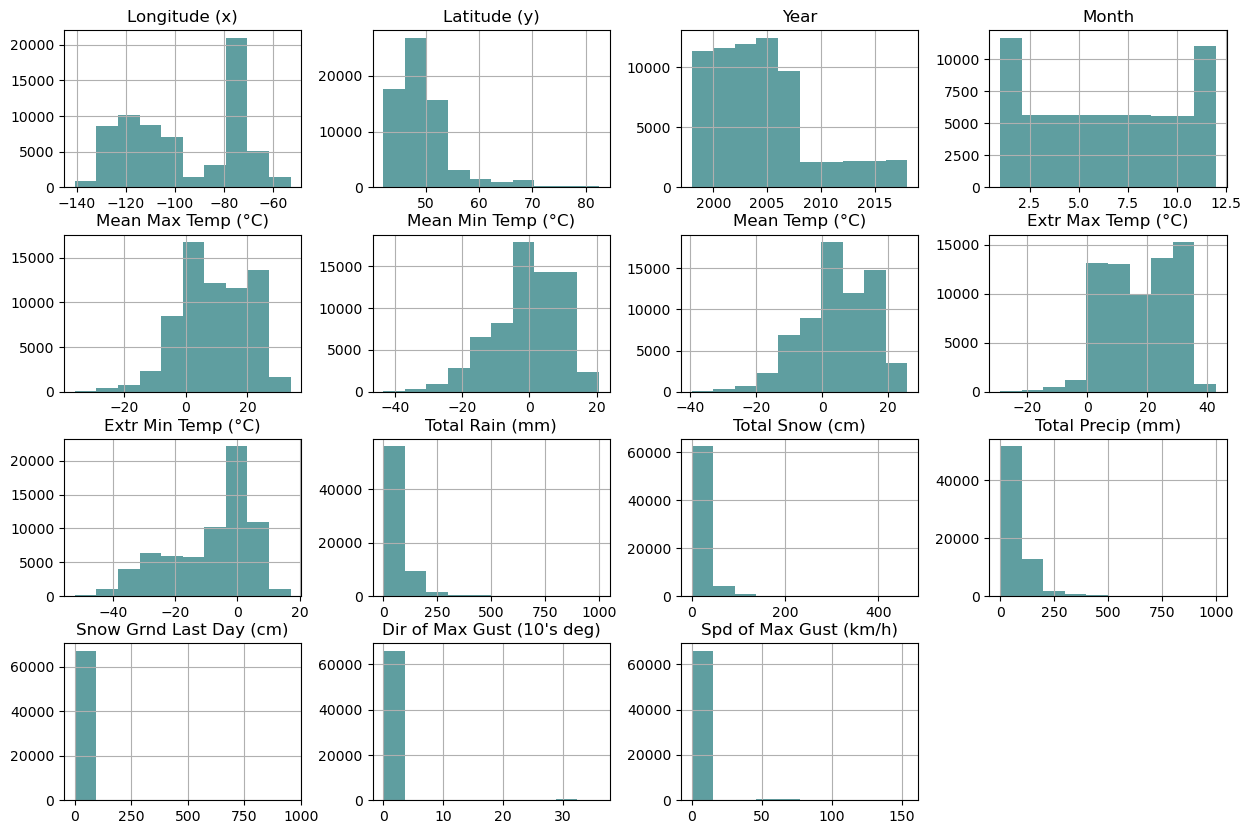

In [17]:
# To extract all numerical columns from the dataset

numerical_data = weather_data.select_dtypes(include=['int64', 'float64'])

# To plot the numerical data using histogram
numerical_data.hist(bins=10, figsize=(15, 10), color='cadetblue')
plt.show()

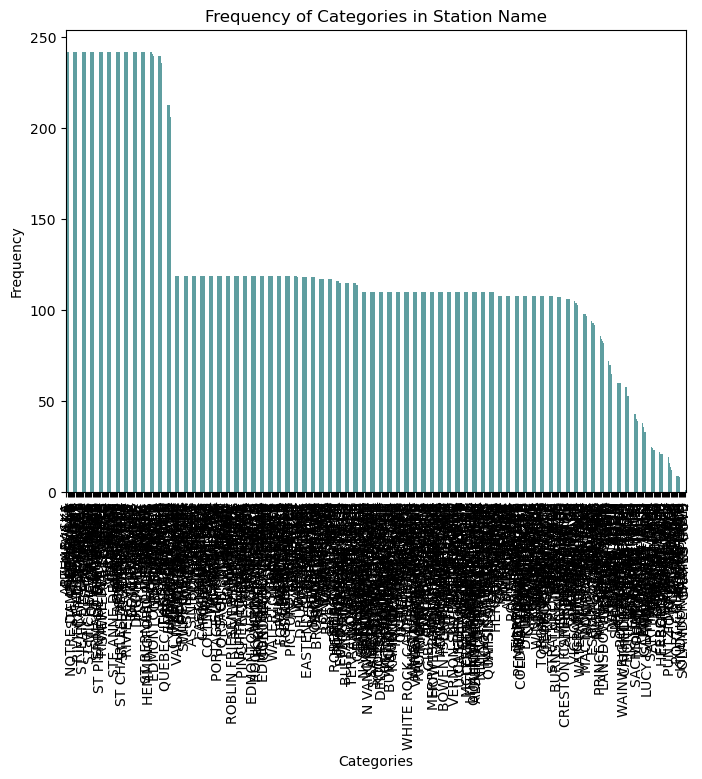

In the column 'Station Name', the dominant category is: ARTHABASKA


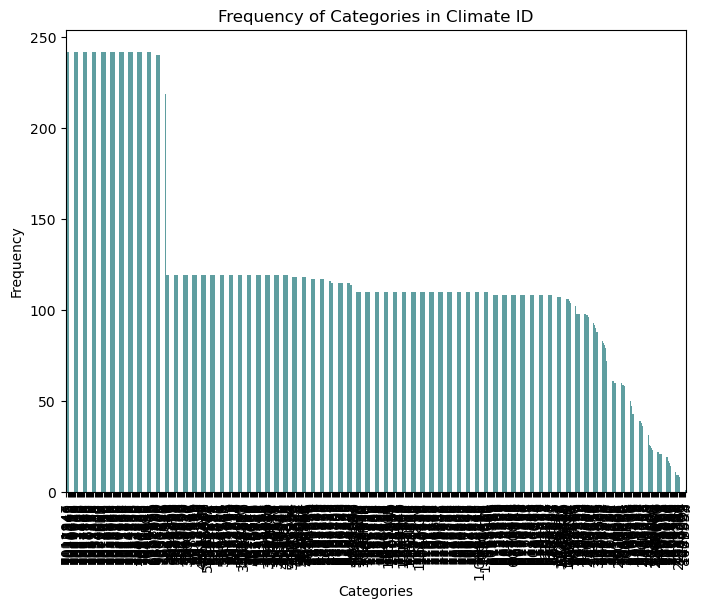

In the column 'Climate ID', the dominant category is: 7011947


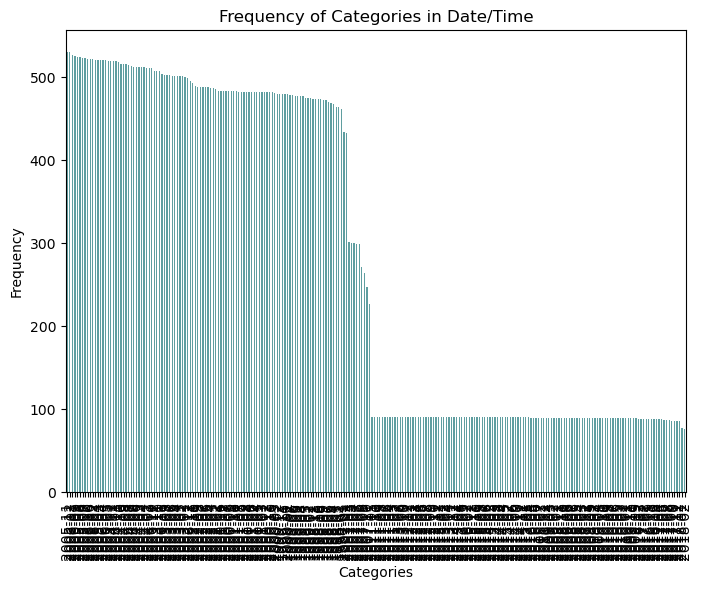

In the column 'Date/Time', the dominant category is: 2005-11


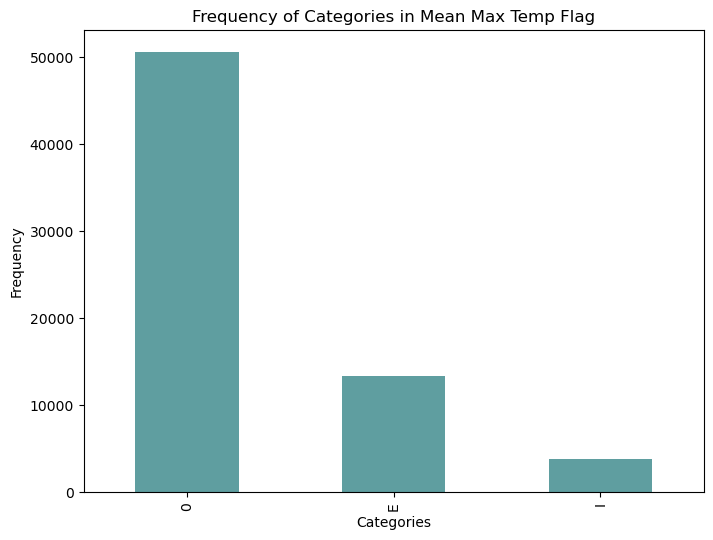

In the column 'Mean Max Temp Flag', the dominant category is: 0


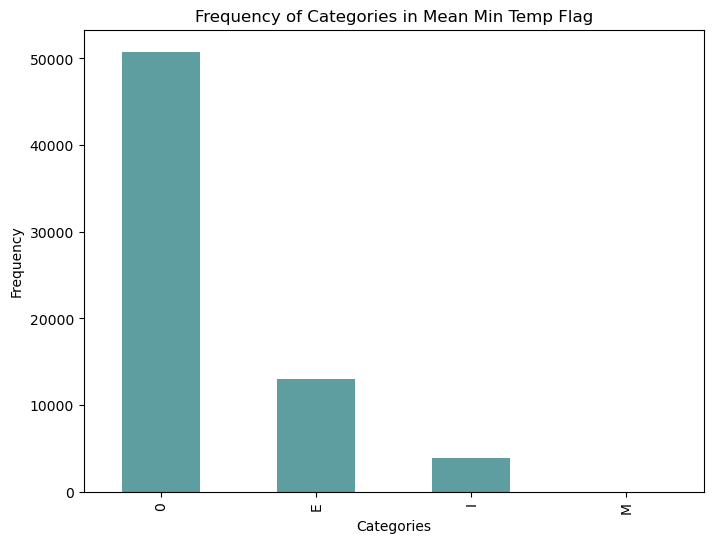

In the column 'Mean Min Temp Flag', the dominant category is: 0


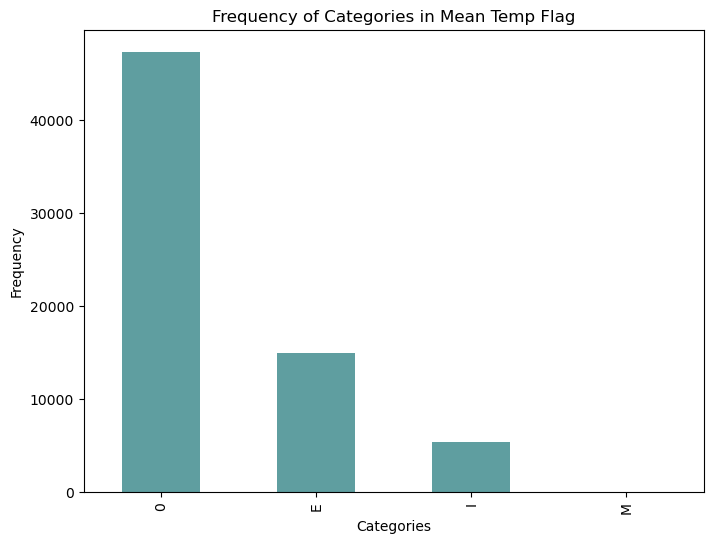

In the column 'Mean Temp Flag', the dominant category is: 0


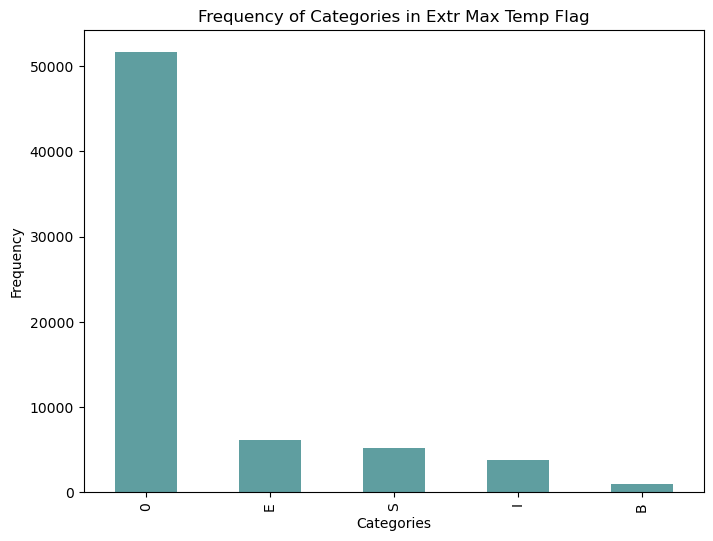

In the column 'Extr Max Temp Flag', the dominant category is: 0


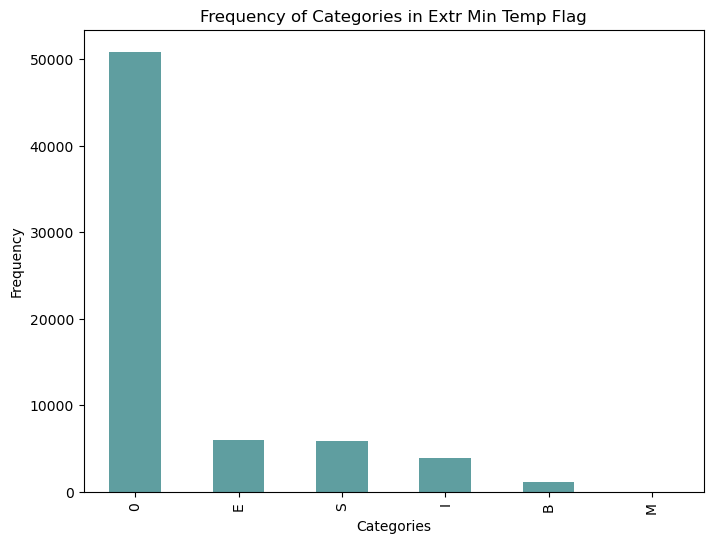

In the column 'Extr Min Temp Flag', the dominant category is: 0


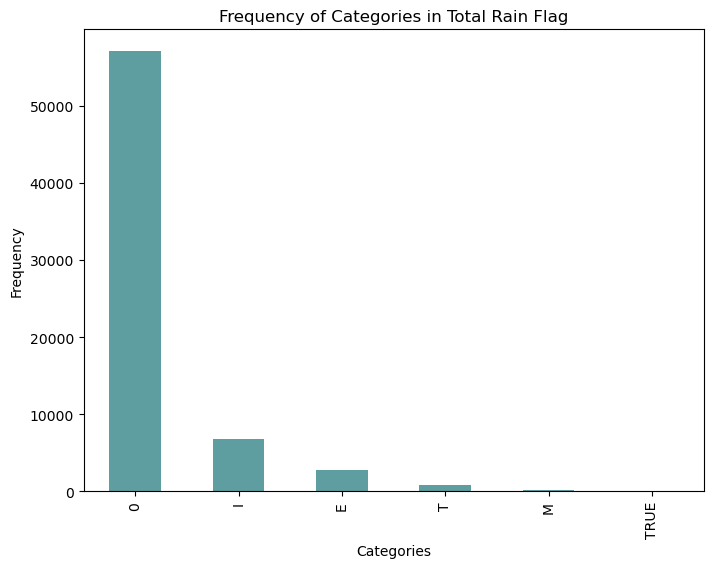

In the column 'Total Rain Flag', the dominant category is: 0


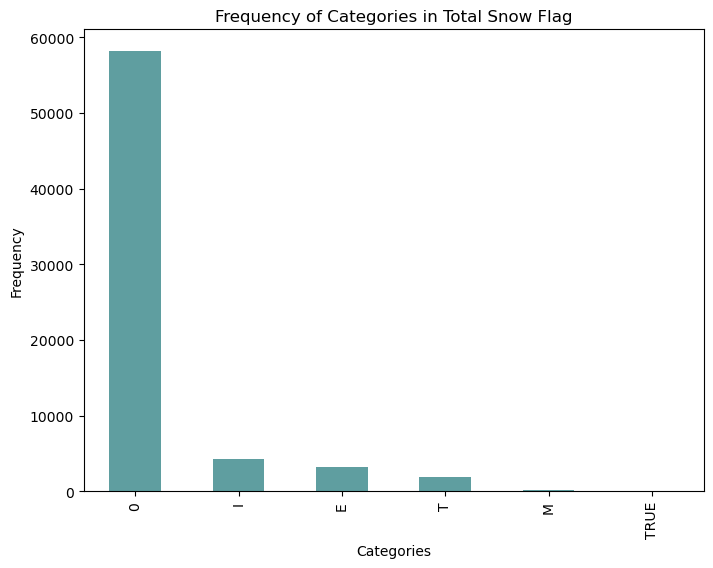

In the column 'Total Snow Flag', the dominant category is: 0


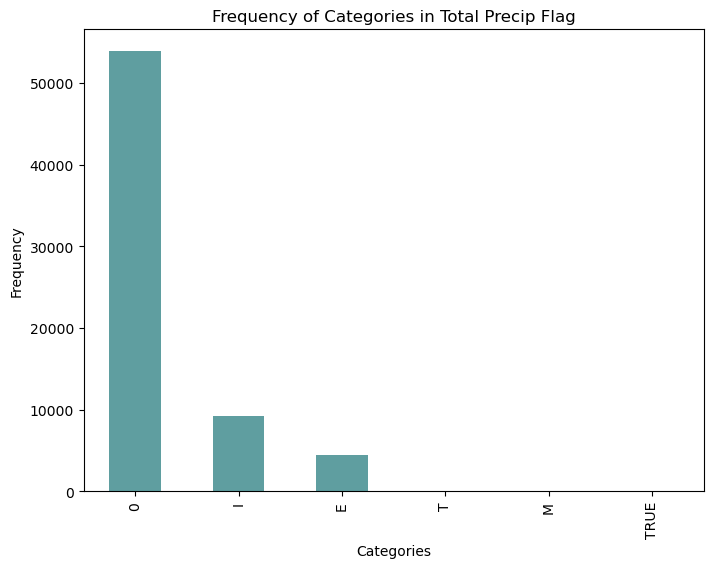

In the column 'Total Precip Flag', the dominant category is: 0


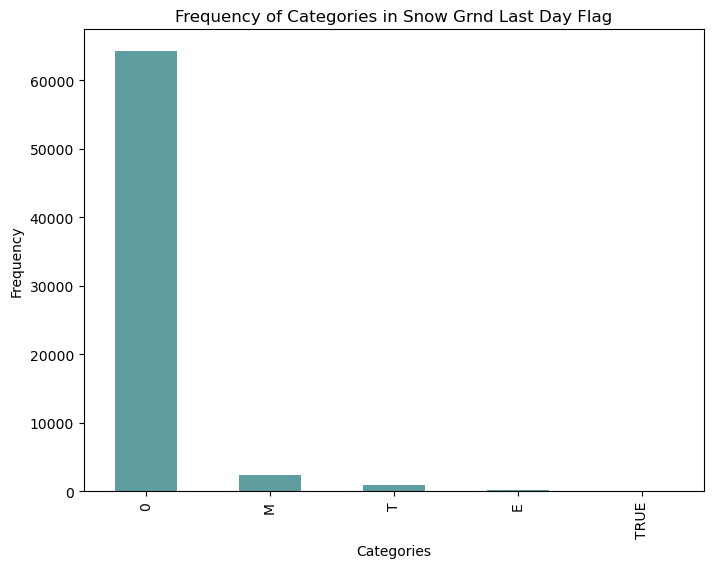

In the column 'Snow Grnd Last Day Flag', the dominant category is: 0


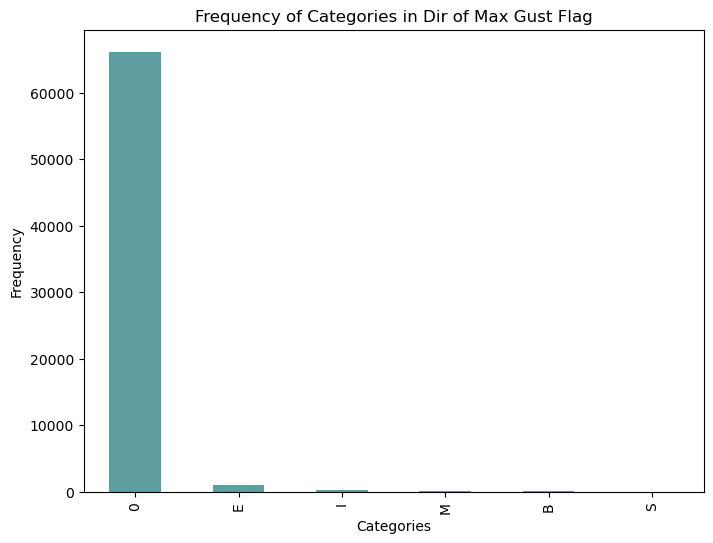

In the column 'Dir of Max Gust Flag', the dominant category is: 0


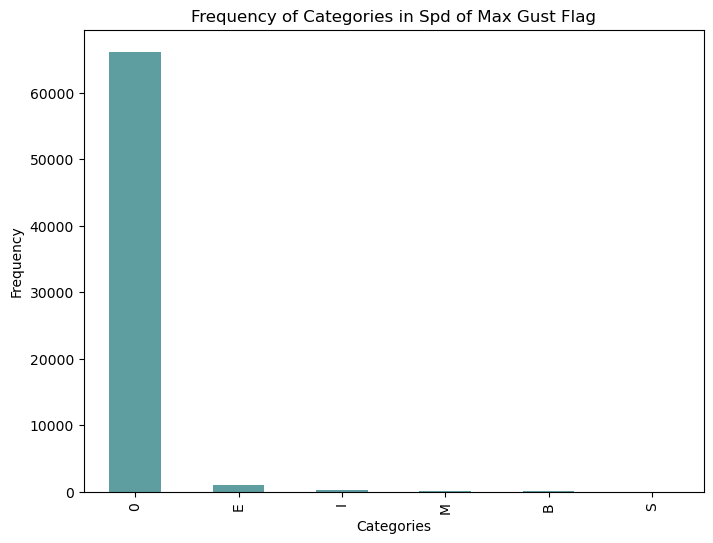

In the column 'Spd of Max Gust Flag', the dominant category is: 0


In [18]:
# To extract all categorical columns from the dataset

categorical_data = weather_data.select_dtypes(include='object')

for column in categorical_data:
    plt.figure(figsize=(8, 6))
    weather_data[column].value_counts().plot(kind='bar', color='cadetblue')
    plt.title(f'Frequency of Categories in {column}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.show()
    
    dominant_category = weather_data[column].value_counts().idxmax()
    print(f"In the column '{column}', the dominant category is: {dominant_category}")

**Bivariate Analysis**

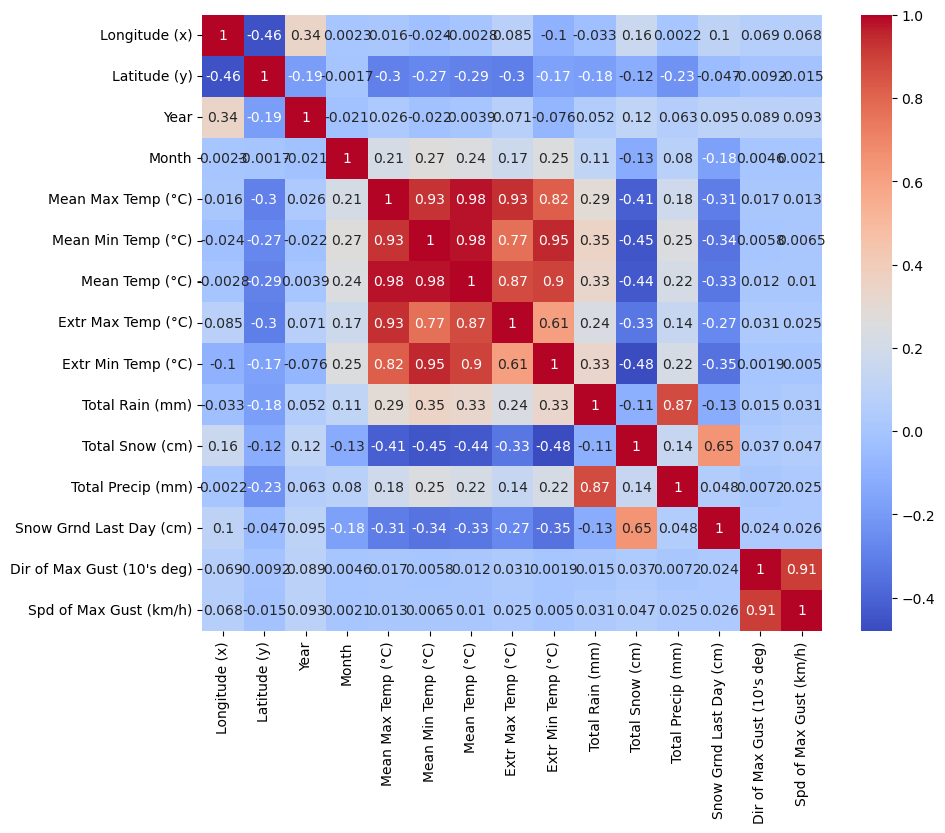

In [19]:
# To get numeric data from  dataset
numerical_data = weather_data.select_dtypes(include=['int64', 'float64'])

# To calculate the correlation matrix for the numeric data
correlation_matrix = numerical_data.corr()

# To visualize the correlation matrix
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()

# the warmer colors represents positive correlation
# the cooler colors represents negative correlation

- numerical variable across categorical variable

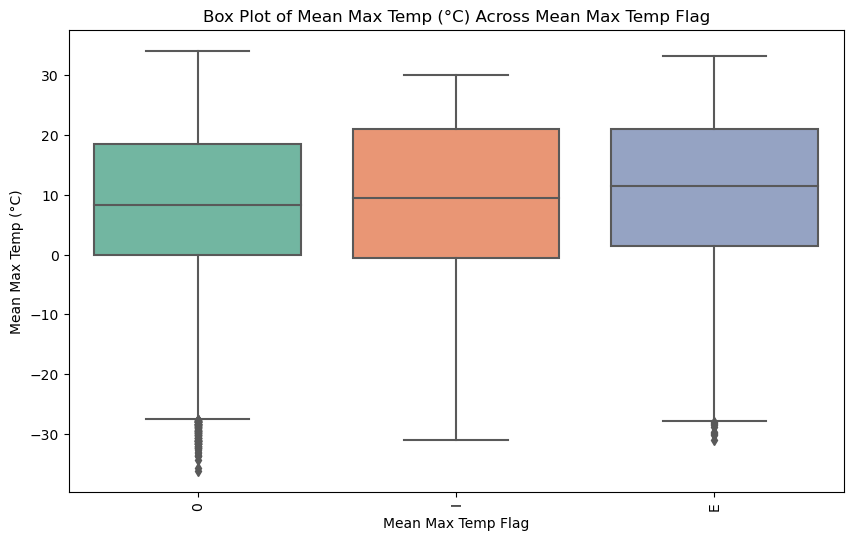

In [20]:
# Numerical column and categorical column
numerical_column = 'Mean Max Temp (°C)'
categorical_column = 'Mean Max Temp Flag'

# To plot using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=categorical_column, y=numerical_column, data=weather_data, palette='Set2')
plt.title(f'Box Plot of {numerical_column} Across {categorical_column}')
plt.xlabel(categorical_column)
plt.ylabel(numerical_column)
plt.xticks(rotation = 90)
plt.show()

# The E is estimated; I is incomplete; and 0 is null values(NaN)

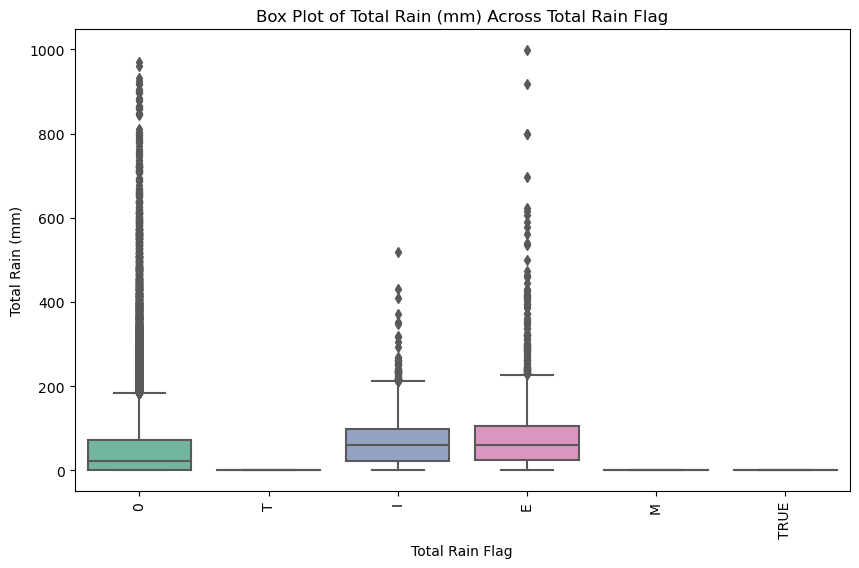

In [21]:
# Numerical column and categorical column
numerical_column = 'Total Rain (mm)'
categorical_column = 'Total Rain Flag'

# To plot using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=categorical_column, y=numerical_column, data=weather_data, palette='Set2')
plt.title(f'Box Plot of {numerical_column} Across {categorical_column}')
plt.xlabel(categorical_column)
plt.ylabel(numerical_column)
plt.xticks(rotation = 90)
plt.show()

# The E is estimated; I is incomplete; 0 is null values(NaN); 
# T is Trace, value is zero; M is Missing; 
# True indicates that there is a special condition or circumstance associated with
#     the mean maximum temperature data for a particular location or time period

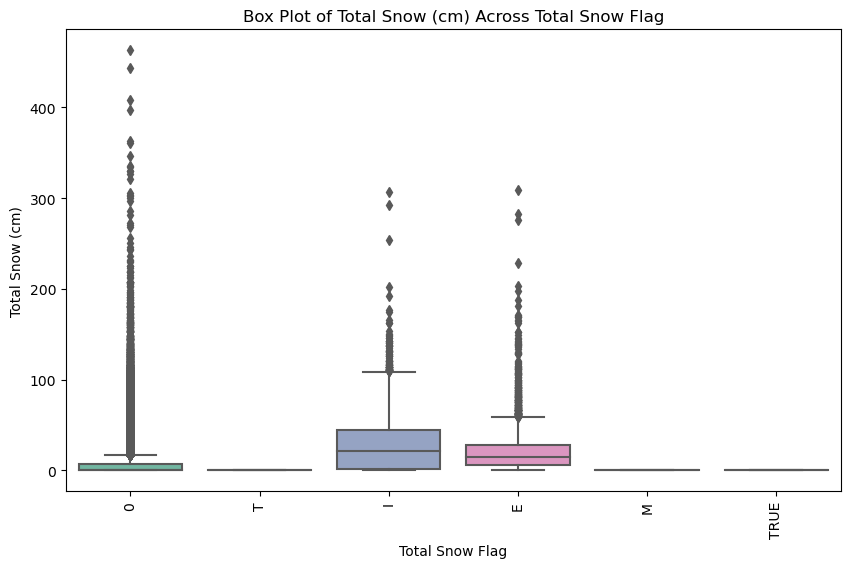

In [22]:
# Numerical column and categorical column
numerical_column = 'Total Snow (cm)'
categorical_column = 'Total Snow Flag'

# To plot using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=categorical_column, y=numerical_column, data=weather_data, palette='Set2')
plt.title(f'Box Plot of {numerical_column} Across {categorical_column}')
plt.xlabel(categorical_column)
plt.ylabel(numerical_column)
plt.xticks(rotation = 90)
plt.show()

# The E is estimated; I is incomplete; 0 is null values(NaN); 
# T is Trace, value is zero; M is Missing; 
# True indicates that there is a special condition or circumstance associated with 
#     the mean maximum temperature data for a particular location or time period

- numerical variable across numerical variable

C:\Users\chust\AppData\Local\Temp\ipykernel_29332\3388400654.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=numerical_column_1, y=numerical_column_2, data=weather_data, palette='Set2')


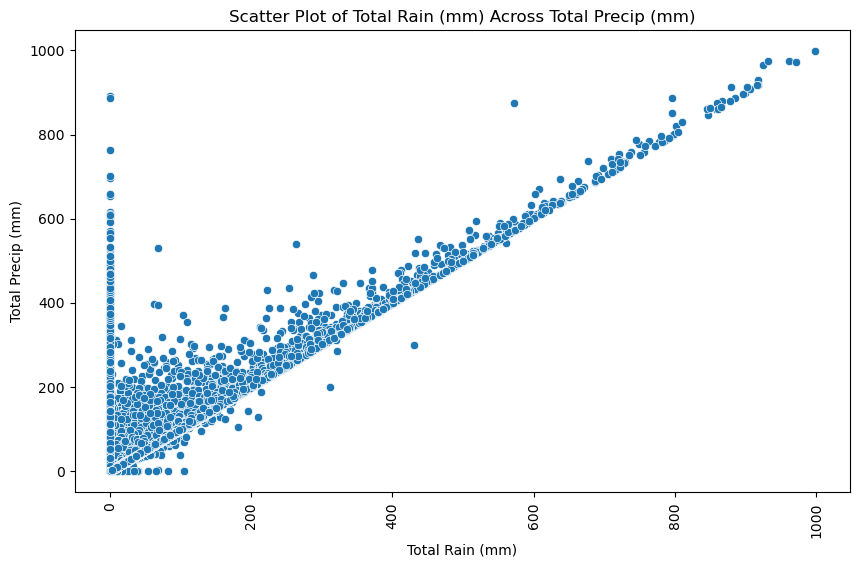

In [23]:
# Numerical columns
numerical_column_1 = 'Total Rain (mm)'
numerical_column_2 = 'Total Precip (mm)'

# To plot using boxplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=numerical_column_1, y=numerical_column_2, data=weather_data, palette='Set2')
plt.title(f'Scatter Plot of {numerical_column_1} Across {numerical_column_2}')
plt.xlabel(numerical_column_1)
plt.ylabel(numerical_column_2)
plt.xticks(rotation = 90)
plt.show()

C:\Users\chust\AppData\Local\Temp\ipykernel_29332\1110376915.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=numerical_column_1, y=numerical_column_2, data=weather_data, palette='Set2')


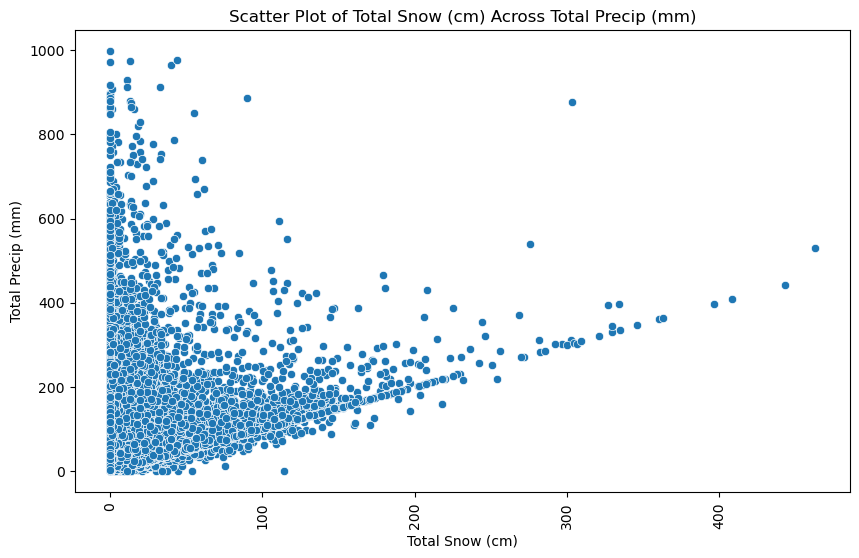

In [24]:
# Numerical columns
numerical_column_1 = 'Total Snow (cm)'
numerical_column_2 = 'Total Precip (mm)'

# To plot using boxplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=numerical_column_1, y=numerical_column_2, data=weather_data, palette='Set2')
plt.title(f'Scatter Plot of {numerical_column_1} Across {numerical_column_2}')
plt.xlabel(numerical_column_1)
plt.ylabel(numerical_column_2)
plt.xticks(rotation = 90)
plt.show()

C:\Users\chust\AppData\Local\Temp\ipykernel_29332\396498519.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=numerical_column_1, y=numerical_column_2, data=weather_data, palette='Set2')


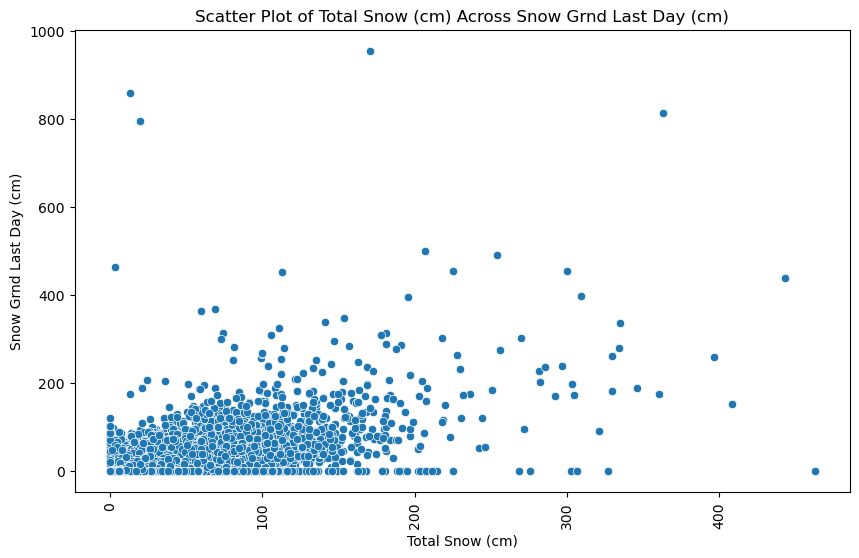

In [25]:
# Numerical columns
numerical_column_1 = 'Total Snow (cm)'
numerical_column_2 = 'Snow Grnd Last Day (cm)'

# To plot using boxplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=numerical_column_1, y=numerical_column_2, data=weather_data, palette='Set2')
plt.title(f'Scatter Plot of {numerical_column_1} Across {numerical_column_2}')
plt.xlabel(numerical_column_1)
plt.ylabel(numerical_column_2)
plt.xticks(rotation = 90)
plt.show()

## Geographies Census Datasets

In [26]:
# Load geojson dataset

census_AB = gpd.read_file("1.a_census_data_AB_CSD_geometry_only.geojson")
census_BC = gpd.read_file("1.a_census_data_BC_CSD_geometry_only.geojson")
census_MB = gpd.read_file("1.a_census_data_MB_CSD_geometry_only.geojson")
census_NB = gpd.read_file("1.a_census_data_NB_CSD_geometry_only.geojson")
census_NL = gpd.read_file("1.a_census_data_NL_CSD_geometry_only.geojson")
census_NS = gpd.read_file("1.a_census_data_NS_CSD_geometry_only.geojson")
census_NT = gpd.read_file("1.a_census_data_NT_CSD_geometry_only.geojson")
census_NU = gpd.read_file("1.a_census_data_NU_CSD_geometry_only.geojson")
census_ON = gpd.read_file("1.a_census_data_ON_CSD_geometry_only.geojson")
census_PE = gpd.read_file("1.a_census_data_PE_CSD_geometry_only.geojson")
census_QC = gpd.read_file("1.a_census_data_QC_CSD_geometry_only.geojson")
census_SK = gpd.read_file("1.a_census_data_SK_CSD_geometry_only.geojson")
census_YT = gpd.read_file("1.a_census_data_YT_CSD_geometry_only.geojson")

In [27]:
# check dataset shapes

print(f'Geographies Census Alberta Dataset Shape: {census_AB.shape}')
print(f'Geographies Census British Columbia Dataset Shape: {census_BC.shape}')
print(f'Geographies Census Manitoba Dataset Shape: {census_MB.shape}')
print(f'Geographies Census New Brunswick Dataset Shape: {census_NB.shape}')
print(f'Geographies Census Newfoundland and Labrador Dataset Shape: {census_NL.shape}')
print(f'Geographies Census Nova Scotia Dataset Shape: {census_NS.shape}')
print(f'Geographies Census Northwest Territories Dataset Shape: {census_NT.shape}')
print(f'Geographies Census Nunavut Dataset Shape: {census_NU.shape}')
print(f'Geographies Census Ontario Dataset Shape: {census_ON.shape}')
print(f'Geographies Census Prince Edward Island Dataset Shape: {census_PE.shape}')
print(f'Geographies Census Quebec Dataset Shape: {census_QC.shape}')
print(f'Geographies Census Saskatchewan Dataset Shape: {census_SK.shape}')
print(f'Geographies Census Yukon Dataset Shape: {census_YT.shape}')

Geographies Census Alberta Dataset Shape: (425, 4)
Geographies Census British Columbia Dataset Shape: (737, 4)
Geographies Census Manitoba Dataset Shape: (229, 4)
Geographies Census New Brunswick Dataset Shape: (273, 4)
Geographies Census Newfoundland and Labrador Dataset Shape: (372, 4)
Geographies Census Nova Scotia Dataset Shape: (96, 4)
Geographies Census Northwest Territories Dataset Shape: (41, 4)
Geographies Census Nunavut Dataset Shape: (31, 4)
Geographies Census Ontario Dataset Shape: (575, 4)
Geographies Census Prince Edward Island Dataset Shape: (112, 4)
Geographies Census Quebec Dataset Shape: (1285, 4)
Geographies Census Saskatchewan Dataset Shape: (950, 4)
Geographies Census Yukon Dataset Shape: (36, 4)


**Checking the AB geographies dataset**

In [28]:
# checking the first 5 rows of the data
census_AB.head()

GeoUID                   Region.Name provincename  \
0  4801003           Cypress County (MD)      Alberta   
1  4801006             Medicine Hat (CY)      Alberta   
2  4801008  Forty Mile County No. 8 (MD)      Alberta   
3  4801009                 Foremost (VL)      Alberta   
4  4801014                Bow Island (T)      Alberta   

                                            geometry  
0  MULTIPOLYGON (((-110.00300 50.83380, -110.0033...  
1  MULTIPOLYGON (((-110.80100 50.05270, -110.7993...  
2  MULTIPOLYGON (((-110.67380 48.99870, -110.7501...  
3  MULTIPOLYGON (((-111.43600 49.46490, -111.4376...  
4  MULTIPOLYGON (((-111.36920 49.88710, -111.3692...

In [29]:
# checking the overview of the geographies dataset

census_AB.info()

# findings:
#     no null values
#     geometry column = multipolygon

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   GeoUID        425 non-null    object  
 1   Region.Name   425 non-null    object  
 2   provincename  425 non-null    object  
 3   geometry      425 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 13.4+ KB


In [30]:
# checking the geometry type of the AB dataset
print(census_AB.geom_type.unique())

['MultiPolygon']


In [31]:
# checking the total area of each MultiPolygon using the 'area' attribute
census_AB_area = census_NB['geometry'].area

census_AB_area

C:\Users\chust\AppData\Local\Temp\ipykernel_29332\1652311078.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  census_AB_area = census_NB['geometry'].area


0      0.072821
1      0.000269
2      0.033823
3      0.041753
4      0.030589
         ...   
268    0.001908
269    0.006975
270    0.000928
271    0.002923
272    0.001553
Length: 273, dtype: float64

In [32]:
# checking the values in the 'geometry' column of AB dataset
AB_geometry_list = census_AB['geometry'].tolist()

AB_geometry_list

# findings:
#     contains multiple longitude and latitude
#     can be used for more detailed analysis of each provinces

[<MULTIPOLYGON (((-110.003 50.834, -110.003 50.805, -110.003 50.782, -110.003...>,
 <MULTIPOLYGON (((-110.801 50.053, -110.799 50.053, -110.797 50.054, -110.795...>,
 <MULTIPOLYGON (((-110.674 48.999, -110.75 48.999, -110.993 48.998, -111 48.9...>,
 <MULTIPOLYGON (((-111.436 49.465, -111.438 49.465, -111.439 49.466, -111.441...>,
 <MULTIPOLYGON (((-111.369 49.887, -111.369 49.873, -111.358 49.873, -111.358...>,
 <MULTIPOLYGON (((-110.801 50.053, -110.803 50.052, -110.806 50.053, -110.808...>,
 <MULTIPOLYGON (((-112.218 49.611, -112.218 49.605, -112.19 49.605, -112.185 ...>,
 <MULTIPOLYGON (((-111.953 48.998, -111.958 48.998, -111.973 48.998, -111.973...>,
 <MULTIPOLYGON (((-112.092 49.156, -112.092 49.158, -112.094 49.159, -112.093...>,
 <MULTIPOLYGON (((-112.208 49.288, -112.21 49.29, -112.209 49.289, -112.208 4...>,
 <MULTIPOLYGON (((-112.649 49.464, -112.65 49.463, -112.645 49.463, -112.645 ...>,
 <MULTIPOLYGON (((-112.53 49.512, -112.528 49.512, -112.527 49.512, -112.526 ...>,
 <MU

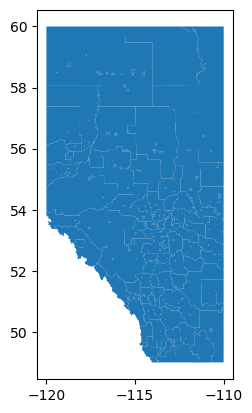

In [33]:
# plotting the Multipolygons to display the locations using plots
import matplotlib.pyplot as plt

census_AB.plot()
plt.show()

for tableau conversion

In [34]:
# converting the MultiPolygon geometries to Well-Known Test
census_AB['geometry_wkt'] = census_AB['geometry'].apply(lambda geom: geom.wkt)
census_AB

GeoUID                   Region.Name provincename  \
0    4801003           Cypress County (MD)      Alberta   
1    4801006             Medicine Hat (CY)      Alberta   
2    4801008  Forty Mile County No. 8 (MD)      Alberta   
3    4801009                 Foremost (VL)      Alberta   
4    4801014                Bow Island (T)      Alberta   
..       ...                           ...          ...   
420  4819071            Peace No. 135 (MD)      Alberta   
421  4819072                   Berwyn (VL)      Alberta   
422  4819074                  Grimshaw (T)      Alberta   
423  4819815        Horse Lakes 152B (IRI)      Alberta   
424  4819826           Duncan's 151A (IRI)      Alberta   

                                              geometry  \
0    MULTIPOLYGON (((-110.00300 50.83380, -110.0033...   
1    MULTIPOLYGON (((-110.80100 50.05270, -110.7993...   
2    MULTIPOLYGON (((-110.67380 48.99870, -110.7501...   
3    MULTIPOLYGON (((-111.43600 49.46490, -111.4376...   
4    MULTIPOLYGON (((-111.36920 49.88710, -111.3692...   
..                                                 ...   
420  MULTIPOLYGON (((-117.35850 56.24820, -117.3588...   
421  MULTIPOLYGON (((-117.72280 56.14790, -117.7241...   
422  MULTIPOLYGON (((-117.59760 56.20390, -117.5978...   
423  MULTIPOLYGON (((-119.71790 55.37410, -119.7179...   
424  MULTIPOLYGON (((-117.86390 56.12000, -117.8504...   

                                          geometry_wkt  
0    MULTIPOLYGON (((-110.003 50.8338, -110.0033 50...  
1    MULTIPOLYGON (((-110.801 50.0527, -110.7993 50...  
2    MULTIPOLYGON (((-110.6738 48.9987, -110.7501 4...  
3    MULTIPOLYGON (((-111.436 49.4649, -111.4376 49...  
4    MULTIPOLYGON (((-111.3692 49.8871, -111.3692 4...  
..                                                 ...  
420  MULTIPOLYGON (((-117.3585 56.2482, -117.3588 5...  
421  MULTIPOLYGON (((-117.7228 56.1479, -117.7241 5...  
422  MULTIPOLYGON (((-117.5976 56.2039, -117.5978 5...  
423  MULTIPOLYGON (((-119.7179 55.3741, -119.7179 5...  
424  MULTIPOLYGON (((-117.8639 56.12, -117.8504 56....  

[425 rows x 5 columns]

In [35]:
# converting the MultiPolygon geometries to GeoJSON
census_AB['geometry_geojson'] = census_AB['geometry'].apply(lambda geom: geom.__geo_interface__)
census_AB

GeoUID                   Region.Name provincename  \
0    4801003           Cypress County (MD)      Alberta   
1    4801006             Medicine Hat (CY)      Alberta   
2    4801008  Forty Mile County No. 8 (MD)      Alberta   
3    4801009                 Foremost (VL)      Alberta   
4    4801014                Bow Island (T)      Alberta   
..       ...                           ...          ...   
420  4819071            Peace No. 135 (MD)      Alberta   
421  4819072                   Berwyn (VL)      Alberta   
422  4819074                  Grimshaw (T)      Alberta   
423  4819815        Horse Lakes 152B (IRI)      Alberta   
424  4819826           Duncan's 151A (IRI)      Alberta   

                                              geometry  \
0    MULTIPOLYGON (((-110.00300 50.83380, -110.0033...   
1    MULTIPOLYGON (((-110.80100 50.05270, -110.7993...   
2    MULTIPOLYGON (((-110.67380 48.99870, -110.7501...   
3    MULTIPOLYGON (((-111.43600 49.46490, -111.4376...   
4    MULTIPOLYGON (((-111.36920 49.88710, -111.3692...   
..                                                 ...   
420  MULTIPOLYGON (((-117.35850 56.24820, -117.3588...   
421  MULTIPOLYGON (((-117.72280 56.14790, -117.7241...   
422  MULTIPOLYGON (((-117.59760 56.20390, -117.5978...   
423  MULTIPOLYGON (((-119.71790 55.37410, -119.7179...   
424  MULTIPOLYGON (((-117.86390 56.12000, -117.8504...   

                                          geometry_wkt  \
0    MULTIPOLYGON (((-110.003 50.8338, -110.0033 50...   
1    MULTIPOLYGON (((-110.801 50.0527, -110.7993 50...   
2    MULTIPOLYGON (((-110.6738 48.9987, -110.7501 4...   
3    MULTIPOLYGON (((-111.436 49.4649, -111.4376 49...   
4    MULTIPOLYGON (((-111.3692 49.8871, -111.3692 4...   
..                                                 ...   
420  MULTIPOLYGON (((-117.3585 56.2482, -117.3588 5...   
421  MULTIPOLYGON (((-117.7228 56.1479, -117.7241 5...   
422  MULTIPOLYGON (((-117.5976 56.2039, -117.5978 5...   
423  MULTIPOLYGON (((-119.7179 55.3741, -119.7179 5...   
424  MULTIPOLYGON (((-117.8639 56.12, -117.8504 56....   

                                      geometry_geojson  
0    {'type': 'MultiPolygon', 'coordinates': [(((-1...  
1    {'type': 'MultiPolygon', 'coordinates': [(((-1...  
2    {'type': 'MultiPolygon', 'coordinates': [(((-1...  
3    {'type': 'MultiPolygon', 'coordinates': [(((-1...  
4    {'type': 'MultiPolygon', 'coordinates': [(((-1...  
..                                                 ...  
420  {'type': 'MultiPolygon', 'coordinates': [(((-1...  
421  {'type': 'MultiPolygon', 'coordinates': [(((-1...  
422  {'type': 'MultiPolygon', 'coordinates': [(((-1...  
423  {'type': 'MultiPolygon', 'coordinates': [(((-1...  
424  {'type': 'MultiPolygon', 'coordinates': [(((-1...  

[425 rows x 6 columns]

In [36]:
# saving the file as csv to be used for tableau
census_AB.to_csv('C:/Users/chust/OneDrive/Data Analytics for Business Course/4th Semester - Winter 2024 Term/DAB 422 - CAPSTONE PROJECT II/Capstone Project/census_AB_geodf.csv', index=False)

**Combining all the geodata files into 1 csv file**

In [ ]:
import geopandas as gpd
import pandas as pd
import os
 
# Directory containing your GeoJSON files

directory = "C:/Users/chust/OneDrive/Data Analytics for Business Course/4th Semester - Winter 2024 Term/DAB 422 - CAPSTONE PROJECT II/Capstone Project" 

# List all GeoJSON files in the directory

files = [file for file in os.listdir(directory) if file.endswith('_CSD_geometry_only.geojson')]
 
# Initialize an empty DataFrame

combined_df = pd.DataFrame()
 
# Read and concatenate GeoJSON files

for file in files:

    gdf = gpd.read_file(os.path.join(directory, file))

    combined_df = pd.concat([combined_df, gdf], ignore_index=True)
 
# Export combined DataFrame to a single CSV file

combined_df.to_csv('C:/Users/chust/OneDrive/Data Analytics for Business Course/4th Semester - Winter 2024 Term/DAB 422 - CAPSTONE PROJECT II/Capstone Project/combined_geographies_csv.csv', index=False)

In [ ]:
#load combined geographies
geojson_data_csv = pd.read_csv("combined_geographies_csv.csv")

In [ ]:
geojson_data_csv.head()

In [ ]:
geojson_data_csv.info()

# combining the geojson files into 1 csv files converts the geometry column into object

In [ ]:
#checking  basic statistical summarie across the dataset for all the numerical columns
geojson_data_csv.describe()

**Combining all the geodata files into 1 geojson file**

In [ ]:
import geopandas as gpd
import os

# Directory containing your GeoJSON files
directory = "C:/Users/chust/OneDrive/Data Analytics for Business Course/4th Semester - Winter 2024 Term/DAB 422 - CAPSTONE PROJECT II/Capstone Project"

# List all GeoJSON files in the directory
files = [file for file in os.listdir(directory) if file.endswith('_CSD_geometry_only.geojson')]

# Initialize an empty GeoDataFrame
combined_gdf = gpd.GeoDataFrame()

# Read and concatenate GeoJSON files
for file in files:
    filepath = os.path.join(directory, file)
    gdf = gpd.read_file(filepath)
    combined_gdf = gpd.GeoDataFrame(pd.concat([combined_gdf, gdf], ignore_index=True))

# Export combined GeoDataFrame to a single GeoJSON file
combined_gdf.to_file('combined_geographies_geojson.geojson', driver='GeoJSON')

In [ ]:
combined_geographies_geojson = gpd.read_file("combined_geographies_geojson.geojson")

In [ ]:
combined_geographies_geojson.head()

In [ ]:
combined_geographies_geojson.info()

# combining the geojson files into 1 geojson files does not convert the geometry column into object

In [ ]:
#checking  basic statistical summarie across the dataset for all the numerical columns
combined_geographies_geojson.describe()

In [ ]:
# checking the total area of each MultiPolygon using the 'area' attribute
geojson_data_area = combined_geographies_geojson['geometry'].area

geojson_data_area

In [ ]:
# checking the values in the 'geometry' column of combined dataset
geometry_list = combined_geographies_geojson['geometry'].tolist()

geometry_list

# findings:
#     contains multiple longitude and latitude
#     can be used for more detailed analysis of each provinces

# geojson: latitude and longitude

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon
import pandas as pd

print(combined_geographies_geojson.head())
print(combined_geographies_geojson.info())

In [ ]:
combined_geographies_geojson_clean = combined_geographies_geojson.explode()
# explode: creates multiple rows (new rows) for each part of the multipolygon | each corresponds to a single part of the polygon

print(combined_geographies_geojson_clean.head())

print(combined_geographies_geojson_clean.info())
# from 5,162 rows to 32,807 rows

In [ ]:
combined_geographies_geojson_clean = combined_geographies_geojson_clean.reset_index(drop = True)
print(combined_geographies_geojson_clean.head())
print(combined_geographies_geojson_clean.info())

In [ ]:
def get_polygon_coordinates(polygon):
    exterior_coords = list(polygon.exterior.coords)
    interior_coords = []
    for interior in polygon.interiors:
        interior_coords += list(interior.coords)
    return exterior_coords + interior_coords

In [ ]:
combined_geographies_geojson_clean['coordinates'] = combined_geographies_geojson_clean.geometry.apply(lambda x: get_polygon_coordinates(x))
combined_geographies_geojson_clean.head()

In [ ]:
combined_geographies_geojson_clean = pd.concat([combined_geographies_geojson_clean, pd.DataFrame(combined_geographies_geojson_clean.coordinates.tolist())], axis = 1)
combined_geographies_geojson_clean.head()

In [ ]:
combined_geographies_geojson_clean = combined_geographies_geojson_clean.drop(columns = ['geometry', 'coordinates'])
combined_geographies_geojson_clean.head()

In [ ]:
for i in range(7):
    combined_geographies_geojson_clean[[f'{i}_longitude', 
                                        f'{i}_latitude']] = pd.DataFrame(combined_geographies_geojson_clean[i].tolist(), 
                                                                         index = combined_geographies_geojson_clean.index)

combined_geographies_geojson_clean.head()

In [ ]:
combined_geographies_geojson_clean.drop(columns = [0, 1, 2, 3, 4, 5, 6], inplace = True)
combined_geographies_geojson_clean.head()

In [ ]:
def compute_min_max_values(row):
    longitudes = [row[f'{i}_longitude'] for i in range(7) if f'{i}_longitude' in row.index]
    latitudes = [row[f'{i}_longitude'] for i in range(7) if f'{i}_latitude' in row.index']
    return pd.Series({
        'min_longitude': min(longitude),
        'max_longitude': max(longitude),
        'min_latitude': min(latitude),
        'max_latitude': max(latitude)
    })

In [ ]:
combined_geographies_geojson_clean['min_longitude', 
                                   'max_longitude', 
                                   'min_latitude', 
                                   'max_latitude'] = combined_geographies_geojson_clean.apply(compute_min_max_values,
                                                                                              axis = 1)

combined_geographies_geojson_clean.head()

In [ ]:
combined_geographies_geojson_clean.drop([''])

In [ ]:
combined_geographies_geojson_clean = combined_geographies_geojson_clean.groupby(['GeoUID', 
                                                                                 'Region.Name', 
                                                                                 'provincename']).agg(min_longitude = ('min_longitude', 'min'),
                                                                                                      max_longitude = ('max_longitude', 'max'),
                                                                                                      min_latitude = ('min_latitude', 'min'),
                                                                                                      max_latitude = ('max_latitude', 'max')).reset_index()

combined_geographies_geojson_clean.head()

In [ ]:
import pandas as pd
import geopandas as gpd
import shapely
import io

# recreate geodataframe
# gdf = gpd.GeoDataFrame(combined_geographies_geojson_clean,
                    #    geometry=combined_geographies_geojson_clean["add"].apply(shapely.wkt.loads))

df_NU = combined_geographies_geojson_clean[combined_geographies_geojson_clean['provincename'] == 'Nunavut']
df_NU.head()

# expand the co-ordinates
exploded_coords = df_NU["geometry"].apply(lambda p: list(p.exterior.coords)).explode()

# Reset the index to avoid duplicate labels
exploded_coords = exploded_coords.reset_index(drop=True)

df_NU_clean = df_NU.assign(x=exploded_coords.apply(lambda coords: coords[0]),
                           y=exploded_coords.apply(lambda coords: coords[1]))

df_NU_clean.head(5)


GeoUID       Region.Name provincename  \
8408  6204001  Sanikiluaq (HAM)      Nunavut   
8409  6204001  Sanikiluaq (HAM)      Nunavut   
8410  6204001  Sanikiluaq (HAM)      Nunavut   
8411  6204003      Iqaluit (CY)      Nunavut   
8412  6204003      Iqaluit (CY)      Nunavut   

                                               geometry        x        y  
8408  POLYGON ((-79.11790 56.48620, -79.11790 56.486... -81.2710  53.2088  
8409  POLYGON ((-79.20380 56.68460, -79.20170 56.684... -81.2684  53.2078  
8410  POLYGON ((-79.14110 56.60480, -79.14380 56.603... -81.2636  53.2043  
8411  POLYGON ((-68.41870 63.72710, -68.42250 63.726... -81.2624  53.2030  
8412  POLYGON ((-68.49710 63.72530, -68.49610 63.724... -81.2624  53.2013

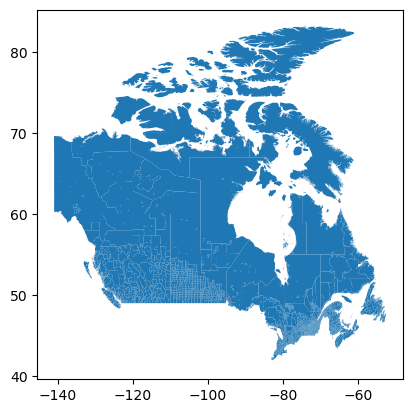

In [ ]:
# plotting the Multipolygons to display the locations using plots
import matplotlib.pyplot as plt

combined_geographies_geojson.plot()
plt.show()

**Univariate Analysis**

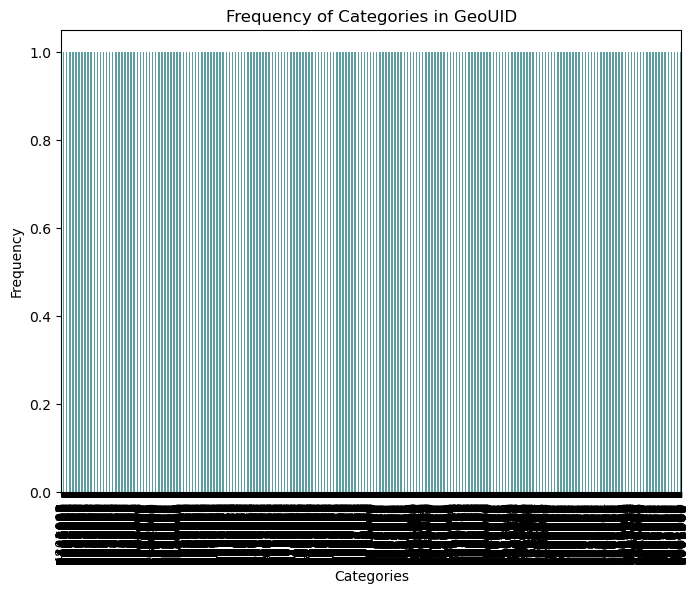

In the column 'GeoUID', the dominant category is: 4801003


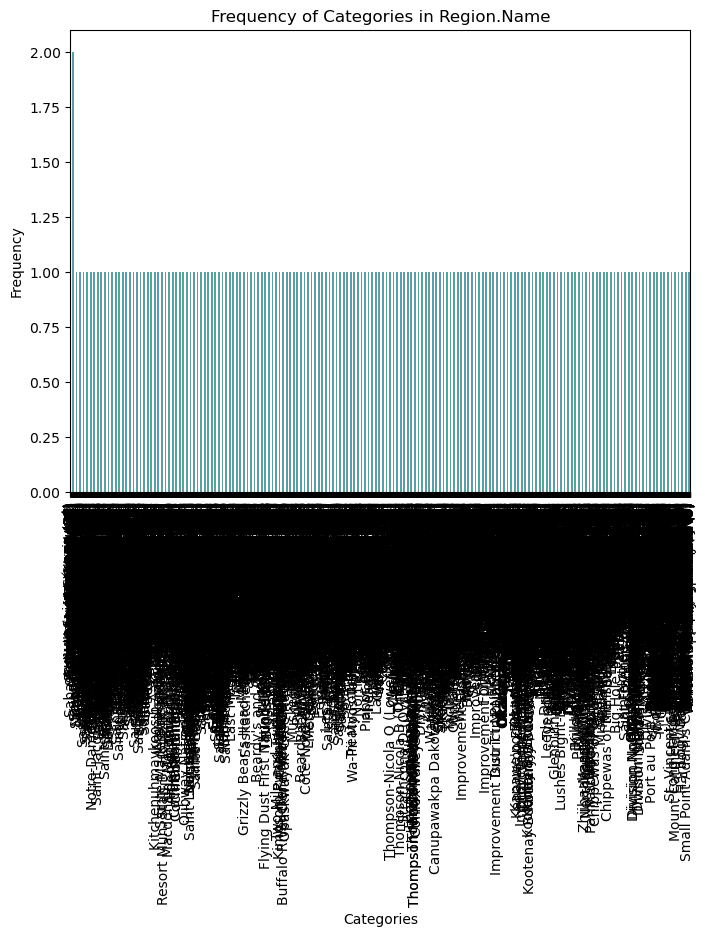

In the column 'Region.Name', the dominant category is: L'Ange-Gardien (MÉ)


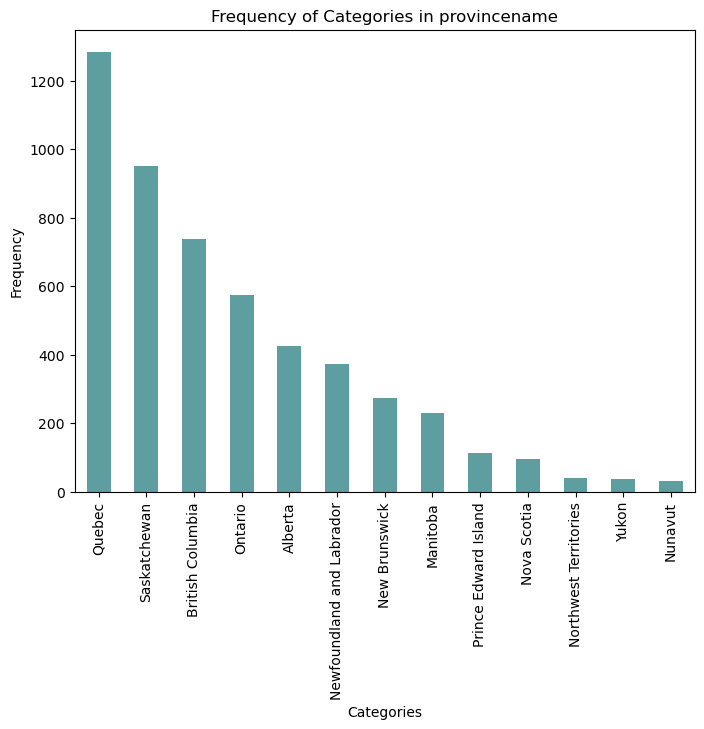

In the column 'provincename', the dominant category is: Quebec


In [ ]:
categorical_data = combined_geographies_geojson.select_dtypes(include='object')

for column in categorical_data:
    plt.figure(figsize=(8, 6))
    combined_geographies_geojson[column].value_counts().plot(kind='bar', color='cadetblue')
    plt.title(f'Frequency of Categories in {column}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.show()
    
    dominant_category = combined_geographies_geojson[column].value_counts().idxmax()
    print(f"In the column '{column}', the dominant category is: {dominant_category}")

## Productivity Datasets

In [ ]:
# Load the productivity dataset

prod_AB = pd.read_csv("4.c_production_in_CSD_inAlberta.csv")
prod_BC = pd.read_csv("4.c_production_in_CSD_inBritish Columbia.csv")
prod_MT = pd.read_csv("4.c_production_in_CSD_inManitoba.csv")
prod_NB = pd.read_csv("4.c_production_in_CSD_inNew Brunswick.csv")
prod_NL = pd.read_csv("4.c_production_in_CSD_inNewfoundland and Labrador.csv")
prod_NS = pd.read_csv("4.c_production_in_CSD_inNova Scotia.csv")
prod_ON = pd.read_csv("4.c_production_in_CSD_inOntario.csv")
prod_PE = pd.read_csv("4.c_production_in_CSD_inPrince Edward Island.csv")
prod_QC = pd.read_csv("4.c_production_in_CSD_inQuebec.csv")
prod_SK = pd.read_csv("4.c_production_in_CSD_inSaskatchewan.csv")

In [ ]:
#checking dataset shapes:

print(f'Productivity AB Dataset Shape: {prod_AB.shape}')
print(f'Productivity BC Dataset Shape: {prod_BC.shape}')
print(f'Productivity MT Dataset Shape: {prod_MT.shape}')
print(f'Productivity NB Dataset Shape: {prod_NB.shape}')
print(f'Productivity NL Dataset Shape: {prod_NL.shape}')
print(f'Productivity NS Dataset Shape: {prod_NS.shape}')
print(f'Productivity ON Dataset Shape: {prod_ON.shape}')
print(f'Productivity PE Dataset Shape: {prod_PE.shape}')
print(f'Productivity QC Dataset Shape: {prod_QC.shape}')
print(f'Productivity SK Dataset Shape: {prod_SK.shape}')

Productivity AB Dataset Shape: (127500, 21)
Productivity BC Dataset Shape: (221100, 21)
Productivity MT Dataset Shape: (68700, 21)
Productivity NB Dataset Shape: (81900, 21)
Productivity NL Dataset Shape: (111600, 21)
Productivity NS Dataset Shape: (28800, 21)
Productivity ON Dataset Shape: (172500, 21)
Productivity PE Dataset Shape: (33600, 21)
Productivity QC Dataset Shape: (385500, 21)
Productivity SK Dataset Shape: (285000, 21)


**Checking the AB dataset**

In [ ]:
# checking the first 5 rows
prod_AB.head()

Date provincename  production_in_division_X22.Utilities  \
0  1997-01-01      Alberta                              1.485804   
1  1997-02-01      Alberta                              1.471049   
2  1997-03-01      Alberta                              1.411428   
3  1997-04-01      Alberta                              1.465141   
4  1997-05-01      Alberta                              1.623730   

   production_in_division_X23.Construction  \
0                                17.399965   
1                                17.695034   
2                                16.630237   
3                                16.642340   
4                                18.062713   

   production_in_division_X31.33.Manufacturing  \
0                                    18.590137   
1                                    19.034434   
2                                    19.274297   
3                                    19.578348   
4                                    19.621579   

   production_in_division_X48.49.Transportation.and.warehousing  \
0                                          13.340542              
1                                          13.617536              
2                                          14.453078              
3                                          13.256295              
4                                          13.355093              

   production_in_division_X61.Educational.services  \
0                                        11.588955   
1                                        11.890582   
2                                        11.962199   
3                                        12.456337   
4                                        12.027437   

   production_in_division_X62.Health.care.and.social.assistance  \
0                                          13.343328              
1                                          13.739512              
2                                          13.321957              
3                                          14.011986              
4                                          13.889241              

   production_in_division_X72.Accommodation.and.food.services  \
0                                           3.872117            
1                                           3.734915            
2                                           3.790906            
3                                           4.100418            
4                                           4.119427            

   production_in_division_X81.Other.services..except.public.administration.  \
0                                           5.368650                          
1                                           5.496880                          
2                                           5.773114                          
3                                           5.658535                          
4                                           5.613666                          

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   production_in_division_X11.Agriculture.forestry.fishing.hunting.21.Mining.quarrying.and.oil.and.gas.extraction  \
0                                         362.713936                                                                
1                                         368.185093                                                                
2                                         385.806995                                                                
3                                         393.425984                                                                
4                                         385.021311                                                                

   production_in_division_X41.Wholesale.trade.44.45.Retail.trade  \
0                                          17.907676               
1                                          17.586050               
2                                          17.377787     

In [ ]:
# checking the overview of the productivity dataset

prod_AB.info()

# findings:
#     there are a few null values in the dataset, for further checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127500 entries, 0 to 127499
Data columns (total 21 columns):
 #   Column                                                                                                          Non-Null Count   Dtype  
---  ------                                                                                                          --------------   -----  
 0   Date                                                                                                            127500 non-null  object 
 1   provincename                                                                                                    127500 non-null  object 
 2   production_in_division_X22.Utilities                                                                            118500 non-null  float64
 3   production_in_division_X23.Construction                                                                         118500 non-null  float64
 4   production_in_division_X31.33.Ma

In [ ]:
# Subset dataset to check null rows
prod_AB_nulls = prod_AB[prod_AB['production_in_division_X22.Utilities'].isnull()]

In [ ]:
# Check the subset dataset
prod_AB_nulls.info()

# findings:
#     all production columns are null for the 9,000 nulls rows under 'production_in_division_X22.Utilities'
#     can be removed since these rows seems to not have useful values

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 13500 to 116999
Data columns (total 21 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   Date                                                                                                            9000 non-null   object 
 1   provincename                                                                                                    9000 non-null   object 
 2   production_in_division_X22.Utilities                                                                            0 non-null      float64
 3   production_in_division_X23.Construction                                                                         0 non-null      float64
 4   production_in_division_X31.33.Manufacturi

**Code to combine multiple csv files into 1 csv file**

In [ ]:
import os
import pandas as pd

# Directory containing your CSV files
directory = 'C:/Users/chust/OneDrive/Data Analytics for Business Course/4th Semester - Winter 2024 Term/DAB 422 - CAPSTONE PROJECT II/Capstone Project'

# List all CSV files in the directory
files = [file for file in os.listdir(directory) if file.startswith('4.c_production_in_CSD_')]

# Initialize an empty DataFrame
combined_df = pd.DataFrame()

# Read and concatenate CSV files
for file in files:
    df = pd.read_csv(os.path.join(directory, file))
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Export combined DataFrame to a single CSV file
combined_df.to_csv('combined_productivity.csv', index=False)

In [ ]:
prod_data = pd.read_csv("combined_productivity.csv")

In [ ]:
prod_data.head()

Date provincename  production_in_division_X22.Utilities  \
0  1997-01-01      Alberta                              1.485804   
1  1997-02-01      Alberta                              1.471049   
2  1997-03-01      Alberta                              1.411428   
3  1997-04-01      Alberta                              1.465141   
4  1997-05-01      Alberta                              1.623730   

   production_in_division_X23.Construction  \
0                                17.399965   
1                                17.695034   
2                                16.630237   
3                                16.642340   
4                                18.062713   

   production_in_division_X31.33.Manufacturing  \
0                                    18.590137   
1                                    19.034434   
2                                    19.274297   
3                                    19.578348   
4                                    19.621579   

   production_in_division_X48.49.Transportation.and.warehousing  \
0                                          13.340542              
1                                          13.617536              
2                                          14.453078              
3                                          13.256295              
4                                          13.355093              

   production_in_division_X61.Educational.services  \
0                                        11.588955   
1                                        11.890582   
2                                        11.962199   
3                                        12.456337   
4                                        12.027437   

   production_in_division_X62.Health.care.and.social.assistance  \
0                                          13.343328              
1                                          13.739512              
2                                          13.321957              
3                                          14.011986              
4                                          13.889241              

   production_in_division_X72.Accommodation.and.food.services  \
0                                           3.872117            
1                                           3.734915            
2                                           3.790906            
3                                           4.100418            
4                                           4.119427            

   production_in_division_X81.Other.services..except.public.administration.  \
0                                           5.368650                          
1                                           5.496880                          
2                                           5.773114                          
3                                           5.658535                          
4                                           5.613666                          

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   production_in_division_X11.Agriculture.forestry.fishing.hunting.21.Mining.quarrying.and.oil.and.gas.extraction  \
0                                         362.713936                                                                
1                                         368.185093                                                                
2                                         385.806995                                                                
3                                         393.425984                                                                
4                                         385.021311                                                                

   production_in_division_X41.Wholesale.trade.44.45.Retail.trade  \
0                                          17.907676               
1                                          17.586050               
2                                          17.377787     

In [ ]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516200 entries, 0 to 1516199
Data columns (total 21 columns):
 #   Column                                                                                                          Non-Null Count    Dtype  
---  ------                                                                                                          --------------    -----  
 0   Date                                                                                                            1516200 non-null  object 
 1   provincename                                                                                                    1516200 non-null  object 
 2   production_in_division_X22.Utilities                                                                            1342800 non-null  float64
 3   production_in_division_X23.Construction                                                                         1342800 non-null  float64
 4   production_in_division_X

In [ ]:
# renaming columns
new_column_names = {
    'production_in_division_X22.Utilities': 'Utilities',
    'production_in_division_X23.Construction': 'Construction',
    'production_in_division_X31.33.Manufacturing': 'Manufacturing',
    'production_in_division_X48.49.Transportation.and.warehousing': 'Transportation and warehousing',
    'production_in_division_X61.Educational.services': 'Educational services',
    'production_in_division_X62.Health.care.and.social.assistance': 'Health care and social assistance',
    'production_in_division_X72.Accommodation.and.food.services': 'Accommodation and food services',
#     'production_in_division_X81.Other.services..except.public.administration': 'Other services',
    'production_in_division_X91.Public.administration': 'Public administration',
    'production_in_division_X11.Agriculture.forestry.fishing.hunting.21.Mining.quarrying.and.oil.and.gas.extraction': 'Agriculture forestry fishing hunting, Mining quarrying and oil and gas extraction',
    'production_in_division_X41.Wholesale.trade.44.45.Retail.trade': 'Wholesale trade Retail trade',
#     'production_division_X52.Finance.and.insurance.53.Real.estate.and.rental.and.leasing': 'Finance and insurance Real estate and rental and leasing',
#    'production_in_division_X54.Professional..scientific.and.technical.services': 'Professional scientific and technical services',
#    'production_in_division_X51.Information.culture.and.recreation': 'Information culture and recreation',
    'production_in_division_X81.Other.services..except.public.administration.': 'Other services except public administration',
    'production_in_division_X52.Finance.and.insurance.53.Real.estate.and.rental.and.leasing': 'Finance and insurance, real estate and rental and leasing',
    'production_in_division_X54.Professional..scientific.and.technical.services.55.56': 'Professional scientific and technical services',
    'production_in_division_X51.Information.culture.and.recreation.71': 'Information culture and recreation'
}

prod_data.rename(columns=new_column_names, inplace=True)

In [ ]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516200 entries, 0 to 1516199
Data columns (total 21 columns):
 #   Column                                                                             Non-Null Count    Dtype  
---  ------                                                                             --------------    -----  
 0   Date                                                                               1516200 non-null  object 
 1   provincename                                                                       1516200 non-null  object 
 2   Utilities                                                                          1342800 non-null  float64
 3   Construction                                                                       1342800 non-null  float64
 4   Manufacturing                                                                      1342800 non-null  float64
 5   Transportation and warehousing                                                     1

In [ ]:
# Subset dataset to check null rows
prod_data_nulls = prod_data[prod_data['Utilities'].isnull()]

In [ ]:
# Check null values in the subset dataset
prod_data_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173400 entries, 13500 to 1516199
Data columns (total 21 columns):
 #   Column                                                                             Non-Null Count   Dtype  
---  ------                                                                             --------------   -----  
 0   Date                                                                               173400 non-null  object 
 1   provincename                                                                       173400 non-null  object 
 2   Utilities                                                                          0 non-null       float64
 3   Construction                                                                       0 non-null       float64
 4   Manufacturing                                                                      0 non-null       float64
 5   Transportation and warehousing                                                     0 non-null

In [ ]:
prod_data_nulls

Date  provincename  Utilities  Construction  Manufacturing  \
13500    1997-01-01       Alberta        NaN           NaN            NaN   
13501    1997-02-01       Alberta        NaN           NaN            NaN   
13502    1997-03-01       Alberta        NaN           NaN            NaN   
13503    1997-04-01       Alberta        NaN           NaN            NaN   
13504    1997-05-01       Alberta        NaN           NaN            NaN   
...             ...           ...        ...           ...            ...   
1516195  2021-08-01  Saskatchewan        NaN           NaN            NaN   
1516196  2021-09-01  Saskatchewan        NaN           NaN            NaN   
1516197  2021-10-01  Saskatchewan        NaN           NaN            NaN   
1516198  2021-11-01  Saskatchewan        NaN           NaN            NaN   
1516199  2021-12-01  Saskatchewan        NaN           NaN            NaN   

         Transportation and warehousing  Educational services  \
13500                               NaN                   NaN   
13501                               NaN                   NaN   
13502                               NaN                   NaN   
13503                               NaN                   NaN   
13504                               NaN                   NaN   
...                                 ...                   ...   
1516195                             NaN                   NaN   
1516196                             NaN                   NaN   
1516197                             NaN                   NaN   
1516198                             NaN                   NaN   
1516199                             NaN                   NaN   

         Health care and social assistance  Accommodation and food services  \
13500                                  NaN                              NaN   
13501                                  NaN                              NaN   
13502                                  NaN                              NaN   
13503                                  NaN                              NaN   
13504                                  NaN                              NaN   
...                                    ...                              ...   
1516195                                NaN                              NaN   
1516196                                NaN                              NaN   
1516197                                NaN                              NaN   
1516198                                NaN                              NaN   
1516199                                NaN                              NaN   

         Other services except public administration  ...  \
13500                                            NaN  ...   
13501                                            NaN  ...   
13502                                            NaN  ...   
13503                                            NaN  ...   
13504                                            NaN  ...   
...                                              ...  ...   
1516195                                          NaN  ...   
1516196                                          NaN  ...   
1516197                                          NaN  ...   
1516198                                          NaN  ...   
1516199                                          NaN  ...   

         Agriculture forestry fishing hunting, Mining quarrying and oil and gas extraction  \
13500                                                  NaN                                   
13501                                                  NaN                                   
13502                                                  NaN                                   
13503                                                  NaN                                   
13504                                                  NaN                                   
...                                                    ...     

In [ ]:
# Calculate the % of null values

total_rows = len(prod_data)
null_rows = prod_data.isnull().sum()

percentage_nulls = (null_rows / total_rows) * 100

print(percentage_nulls)
#print(f"The percentage of null values is: {percentage_nulls:.2f}%")

# findings:
#     since the null rows does not contain anything useful, we can drop them

Date                                                                                  0.000000
provincename                                                                          0.000000
Utilities                                                                            11.436486
Construction                                                                         11.436486
Manufacturing                                                                        11.436486
Transportation and warehousing                                                       11.436486
Educational services                                                                 11.436486
Health care and social assistance                                                    11.436486
Accommodation and food services                                                      11.436486
Other services except public administration                                          11.436486
Public administration                             

In [ ]:
# Create a new DataFrame without null values
prod_data_clean = prod_data.dropna(subset=['Utilities'])

In [ ]:
prod_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1342800 entries, 0 to 1515899
Data columns (total 21 columns):
 #   Column                                                                             Non-Null Count    Dtype  
---  ------                                                                             --------------    -----  
 0   Date                                                                               1342800 non-null  object 
 1   provincename                                                                       1342800 non-null  object 
 2   Utilities                                                                          1342800 non-null  float64
 3   Construction                                                                       1342800 non-null  float64
 4   Manufacturing                                                                      1342800 non-null  float64
 5   Transportation and warehousing                                                     134280

In [ ]:
# Save clean productivity data file
prod_data_clean.to_csv('C:/Users/chust/OneDrive/Data Analytics for Business Course/3rd Semester - Fall 2023 Term/DAC 322 - Capstone Project/Captsone Project/combined_productivity_clean.csv', index=False)

**Univariate Analysis**

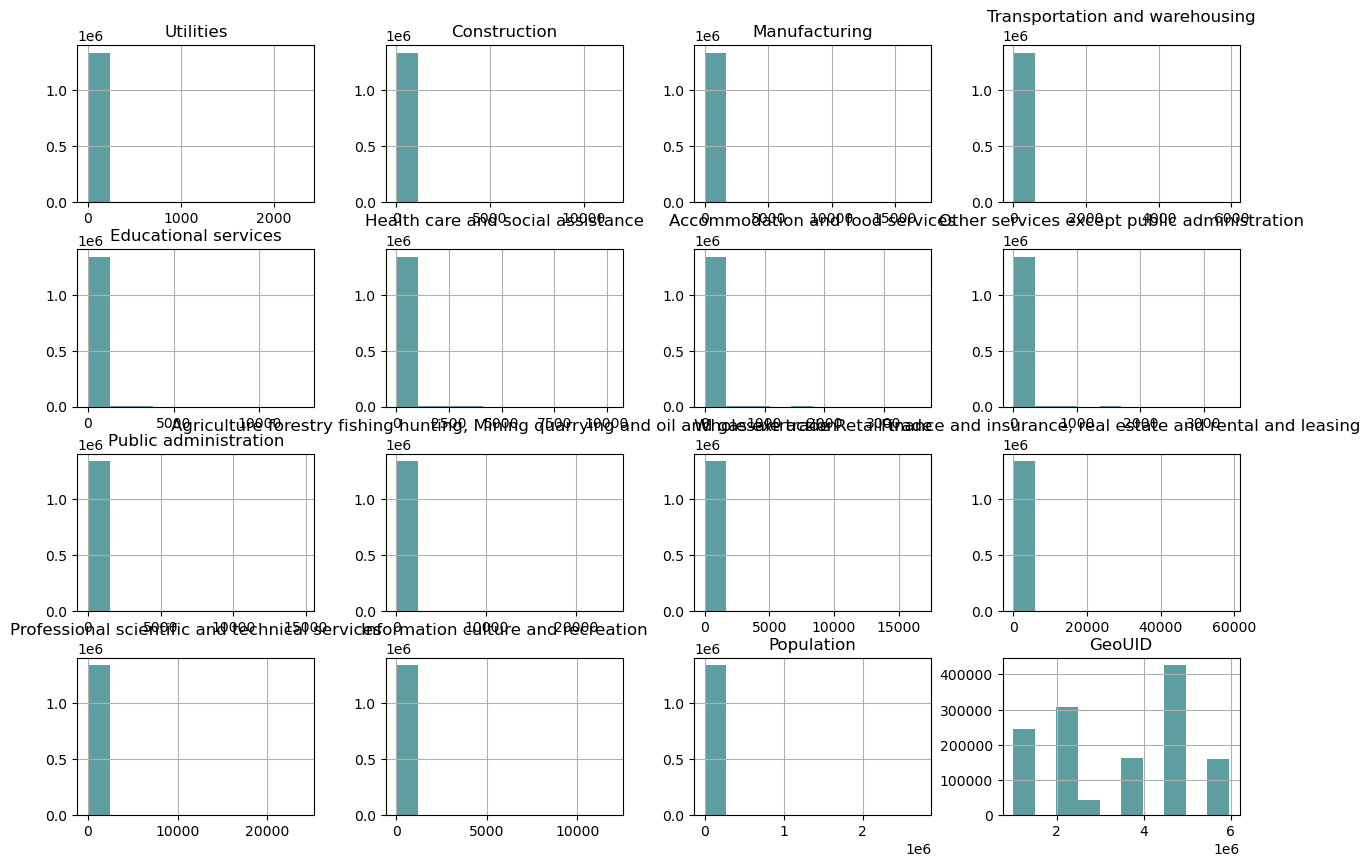

In [ ]:
# To extract all numerical columns from the dataset

numerical_data = prod_data_clean.select_dtypes(include=['int64', 'float64'])

# To plot the numerical data using histogram
numerical_data.hist(bins=10, figsize=(15, 10), color='cadetblue')
plt.show()

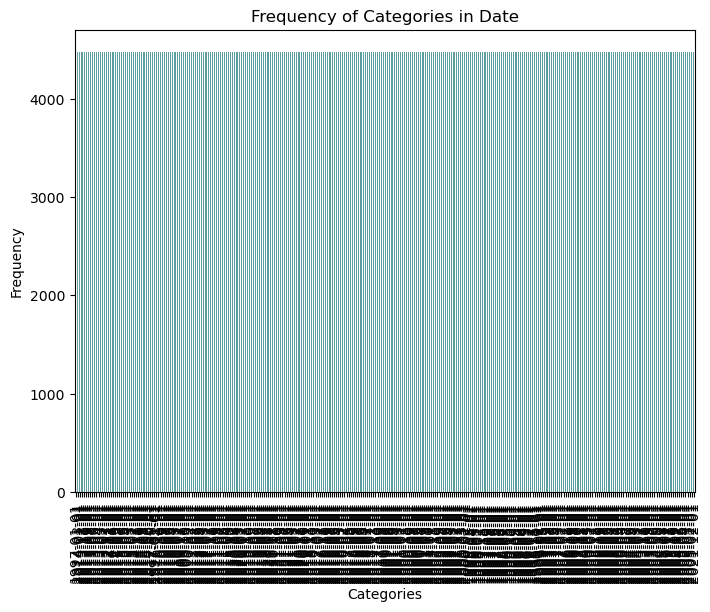

In the column 'Date', the dominant category is: 1997-01-01


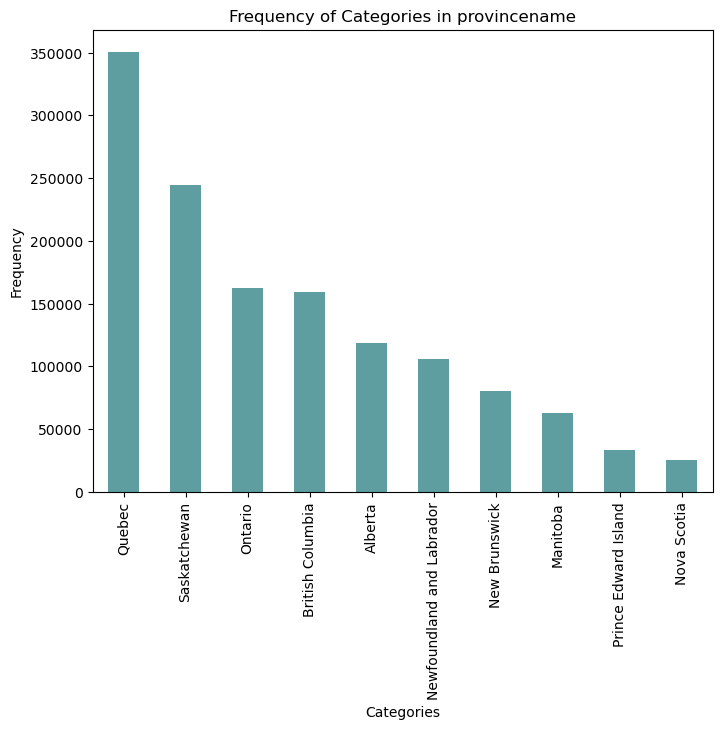

In the column 'provincename', the dominant category is: Quebec


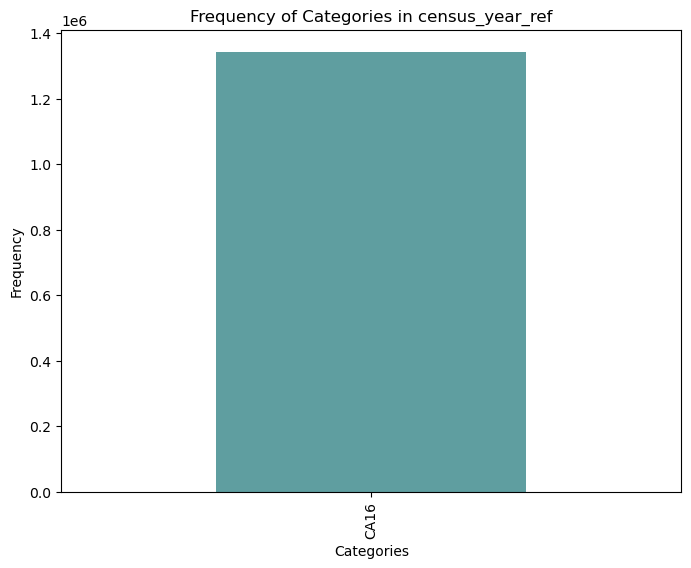

In the column 'census_year_ref', the dominant category is: CA16


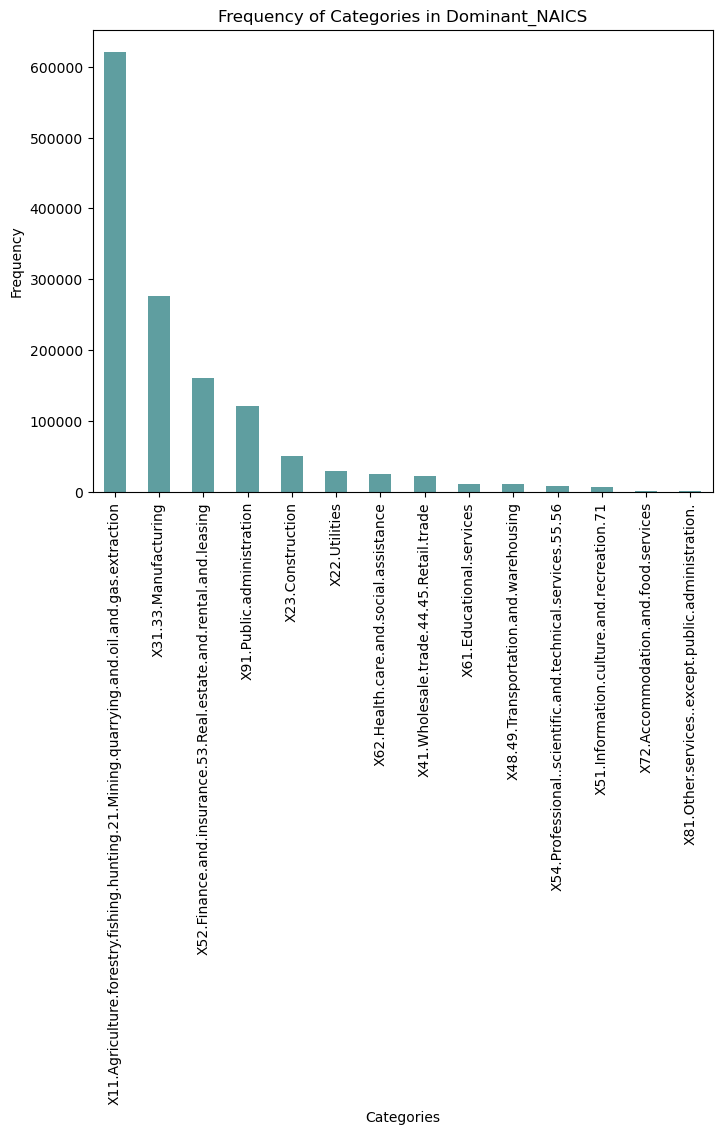

In the column 'Dominant_NAICS', the dominant category is: X11.Agriculture.forestry.fishing.hunting.21.Mining.quarrying.and.oil.and.gas.extraction


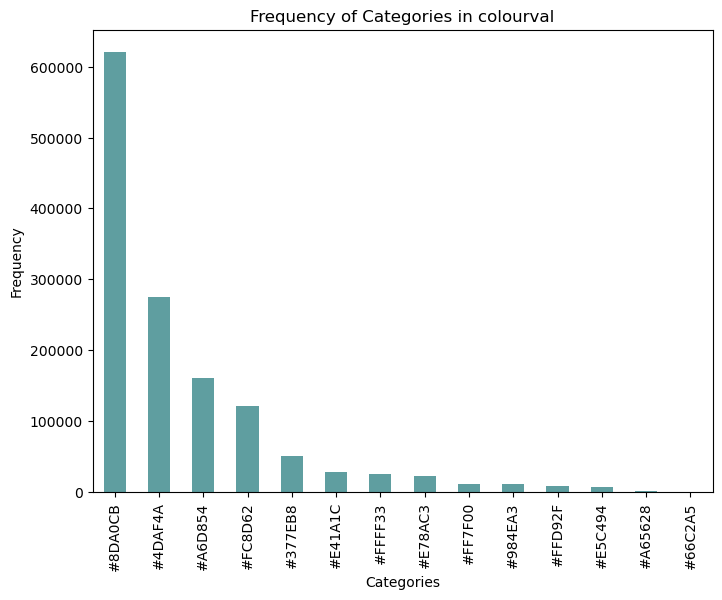

In the column 'colourval', the dominant category is: #8DA0CB


In [ ]:
categorical_data = prod_data_clean.select_dtypes(include='object')

for column in categorical_data:
    plt.figure(figsize=(8, 6))
    prod_data_clean[column].value_counts().plot(kind='bar', color='cadetblue')
    plt.title(f'Frequency of Categories in {column}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.show()
    
    dominant_category = prod_data_clean[column].value_counts().idxmax()
    print(f"In the column '{column}', the dominant category is: {dominant_category}")

**Bivariate Analysis**

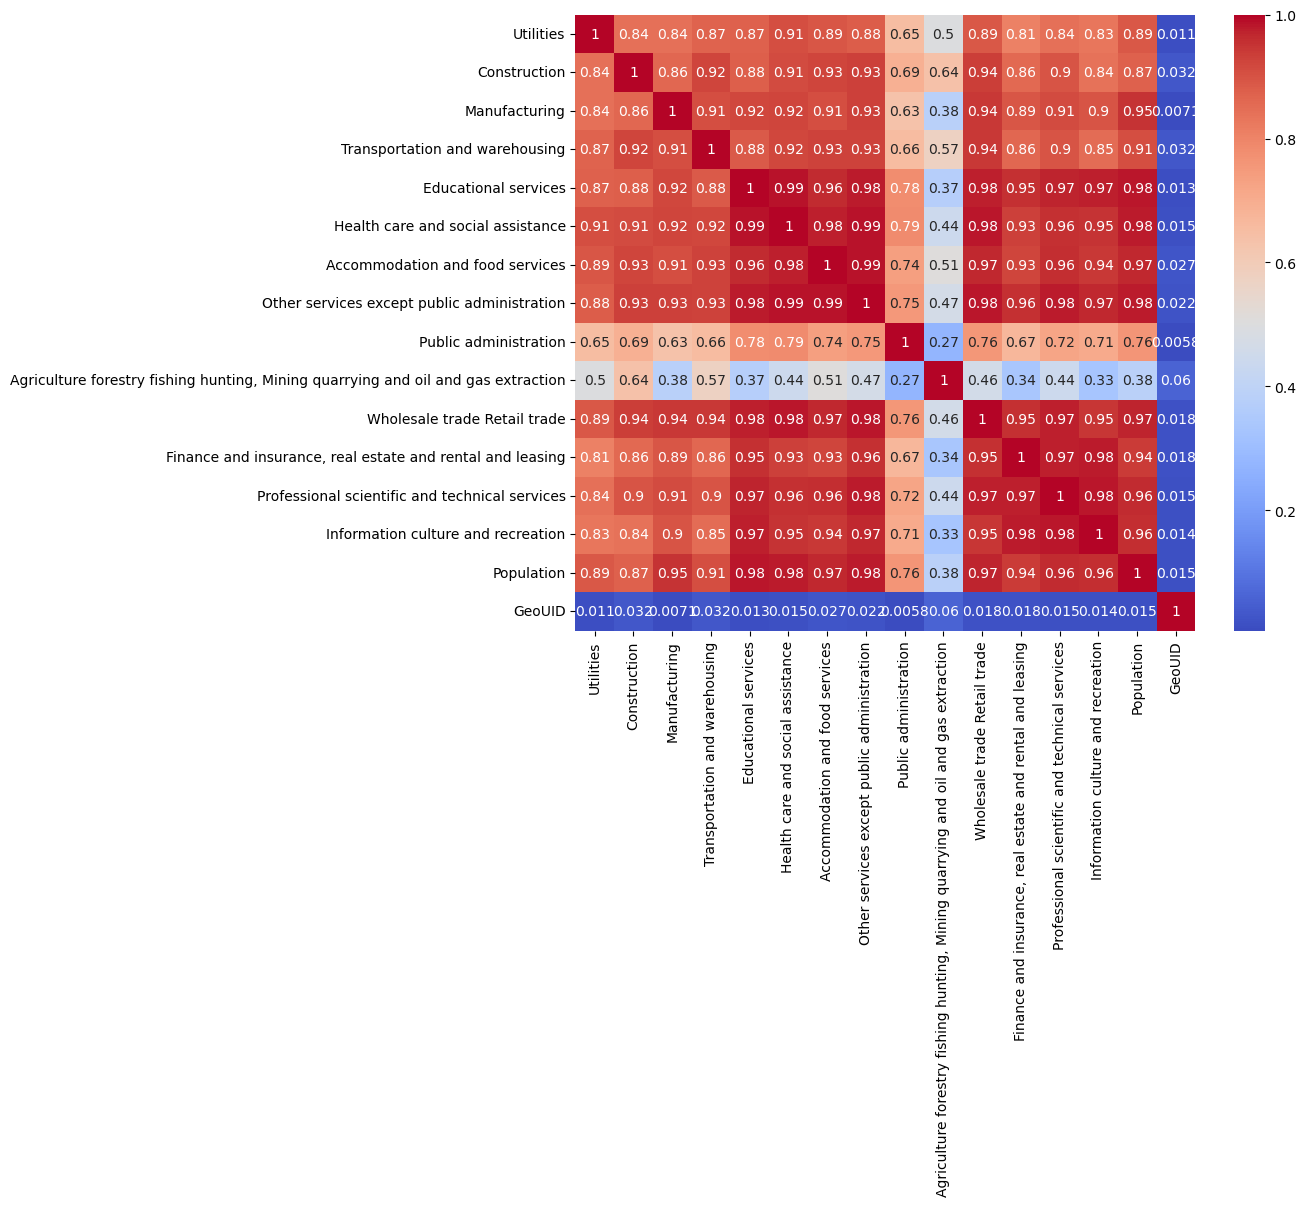

In [ ]:
# To get numeric data from clv dataset
numerical_data = prod_data_clean.select_dtypes(include=['int64', 'float64'])

# To calculate the correlation matrix for the numeric data
correlation_matrix = numerical_data.corr()

# To visualize the correlation matrix
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
prod_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1342800 entries, 0 to 1515899
Data columns (total 21 columns):
 #   Column                                                                             Non-Null Count    Dtype  
---  ------                                                                             --------------    -----  
 0   Date                                                                               1342800 non-null  object 
 1   provincename                                                                       1342800 non-null  object 
 2   Utilities                                                                          1342800 non-null  float64
 3   Construction                                                                       1342800 non-null  float64
 4   Manufacturing                                                                      1342800 non-null  float64
 5   Transportation and warehousing                                                     134280

- numerical variables across numerical variables

C:\Users\chust\AppData\Local\Temp\ipykernel_24116\387751099.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=numerical_column_1, y=numerical_column_2, data=prod_data_clean, palette='Set2')


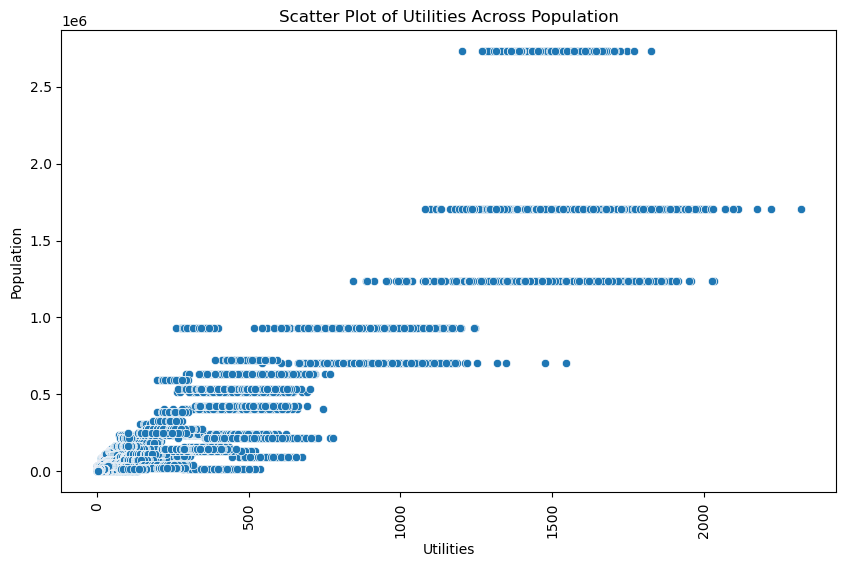

In [ ]:
# Numerical columns
numerical_column_1 = 'Utilities'
numerical_column_2 = 'Population'

# To plot using boxplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=numerical_column_1, y=numerical_column_2, data=prod_data_clean, palette='Set2')
plt.title(f'Scatter Plot of {numerical_column_1} Across {numerical_column_2}')
plt.xlabel(numerical_column_1)
plt.ylabel(numerical_column_2)
plt.xticks(rotation = 90)
plt.show()

C:\Users\chust\AppData\Local\Temp\ipykernel_24116\1722785632.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=numerical_column_1, y=numerical_column_2, data=prod_data_clean, palette='Set2')


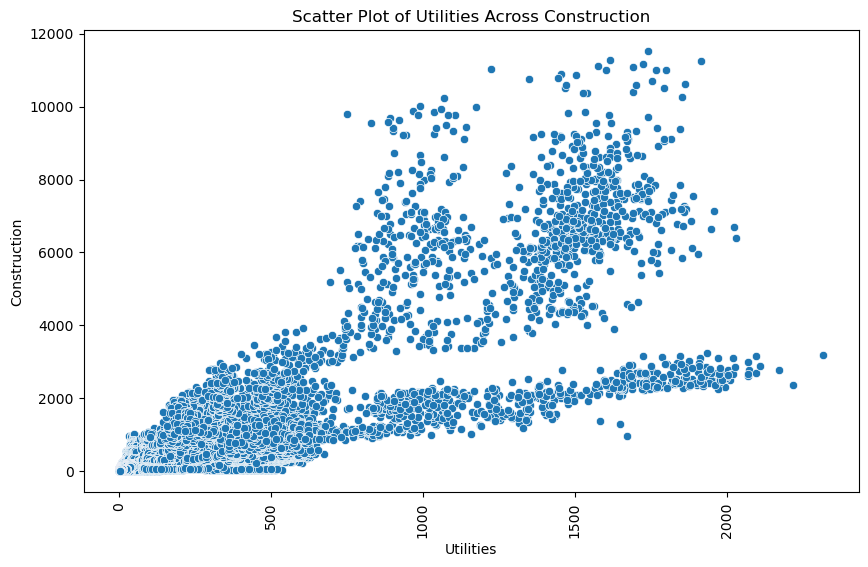

In [ ]:
# Numerical columns
numerical_column_1 = 'Utilities'
numerical_column_2 = 'Construction'

# To plot using boxplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=numerical_column_1, y=numerical_column_2, data=prod_data_clean, palette='Set2')
plt.title(f'Scatter Plot of {numerical_column_1} Across {numerical_column_2}')
plt.xlabel(numerical_column_1)
plt.ylabel(numerical_column_2)
plt.xticks(rotation = 90)
plt.show()

C:\Users\chust\AppData\Local\Temp\ipykernel_24116\3515129190.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=numerical_column_1, y=numerical_column_2, data=prod_data_clean, palette='Set2')


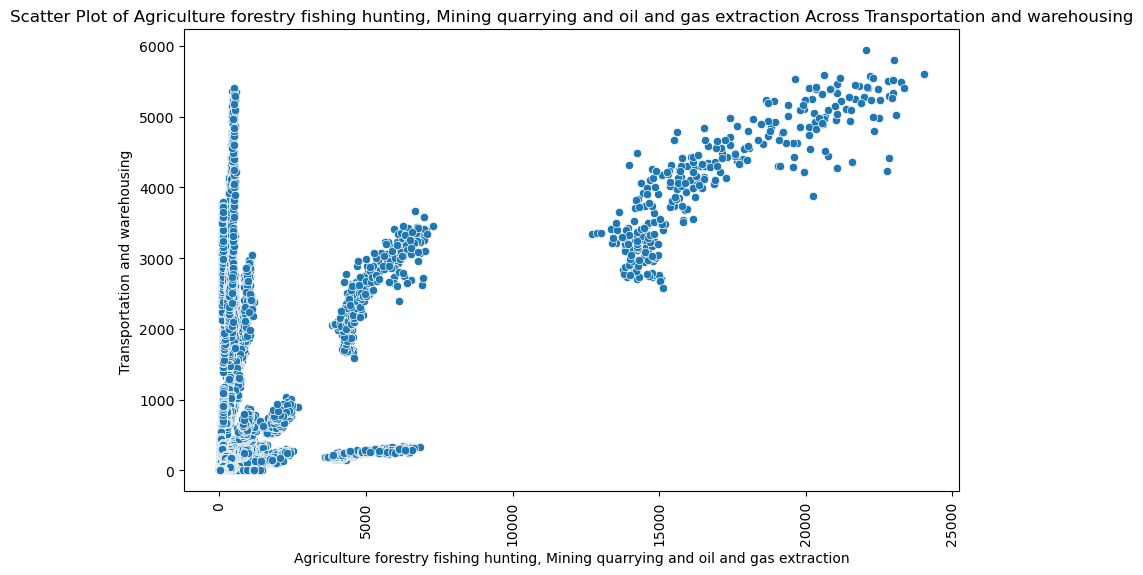

In [ ]:
# Numerical columns
numerical_column_1 = "Agriculture forestry fishing hunting, Mining quarrying and oil and gas extraction"
numerical_column_2 = 'Transportation and warehousing'

# To plot using boxplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=numerical_column_1, y=numerical_column_2, data=prod_data_clean, palette='Set2')
plt.title(f'Scatter Plot of {numerical_column_1} Across {numerical_column_2}')
plt.xlabel(numerical_column_1)
plt.ylabel(numerical_column_2)
plt.xticks(rotation = 90)
plt.show()

## Data visualization

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming your DataFrame is named 'weather_data'
# Convert 'Date/Time' column to datetime if not already done
weather_data['Date/Time'] = pd.to_datetime(weather_data['Date/Time'])

# Extracting year from the 'Date/Time' column
weather_data['Year'] = weather_data['Date/Time'].dt.year

# Grouping by 'Year' and calculating mean of 'Total Snow' and 'Total Rain'
yearly_avg = weather_data.groupby('Year')[['Total Snow (cm)', 'Total Rain (mm)']].mean().reset_index()

# Creating an interactive plot with plotly express
fig = px.line(yearly_avg, x='Year', y=['Total Snow (cm)', 'Total Rain (mm)'], 
              labels={'value': 'Average'},
              title='Average Total of Snow and Rain Over the Years')


# Update x-axis ticks
fig.update_xaxes(tickmode='linear', tickvals=list(range(1998, 2019, 2)))

fig.update_layout(xaxis_title='Year', yaxis_title='Average of Rain (mm) and Snow (cm)',
                  hovermode='closest', hoverlabel=dict(bgcolor="white", font_size=12))
fig.show()

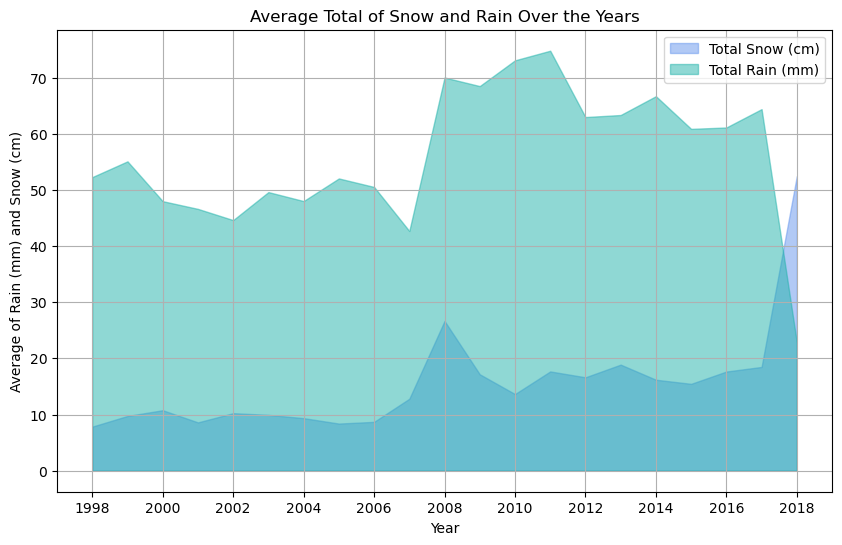

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'weather_data'
# Convert 'Date/Time' column to datetime if not already done
weather_data['Date/Time'] = pd.to_datetime(weather_data['Date/Time'])

# Extracting year from the 'Date/Time' column
weather_data['Year'] = weather_data['Date/Time'].dt.year

# Grouping by 'Year' and calculating mean of 'Total Snow' and 'Total Rain'
yearly_avg = weather_data.groupby('Year')[['Total Snow (cm)', 'Total Rain (mm)']].mean().reset_index()

# Plotting the graph
plt.figure(figsize=(10, 6))

# Area plot for Total Snow with color 'blue'
plt.fill_between(yearly_avg['Year'], yearly_avg['Total Snow (cm)'], label='Total Snow (cm)', color='cornflowerblue', alpha=0.5)

# Area plot for Total Rain with color 'green'
plt.fill_between(yearly_avg['Year'], yearly_avg['Total Rain (mm)'], label='Total Rain (mm)', color='lightseagreen', alpha=0.5)

plt.xlabel('Year')
plt.ylabel('Average of Rain (mm) and Snow (cm)')
plt.title('Average Total of Snow and Rain Over the Years')
plt.legend()
plt.grid(True)

# Set the x-axis ticks to show specific years
plt.xticks(range(1998, 2019, 2))

plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming your DataFrame is named 'weather_data'
# Extracting year and quarter from the 'Date/Time' column
weather_data['Date/Time'] = pd.to_datetime(weather_data['Date/Time'])
weather_data['Year'] = weather_data['Date/Time'].dt.year
weather_data['Quarter'] = weather_data['Date/Time'].dt.quarter

# Calculate average min mean temp and min max temp for all 4 quarters
avg_quarterly_temp = weather_data.groupby(['Year', 'Quarter']).agg({'Mean Min Temp (°C)': 'mean', 'Mean Max Temp (°C)': 'mean'}).reset_index()

fig = px.line(avg_quarterly_temp, x='Quarter', y=['Mean Min Temp (°C)', 'Mean Max Temp (°C)'], animation_frame='Year', 
              labels={'variable': 'Temperature Type', 'value': 'Temperature (°C)'},
              title='Average Min Mean Temp and Min Max Temp for all Quarters over Years')

# Update the x-axis labels for quarters
fig.update_xaxes(tickmode='array', tickvals=[1, 2, 3, 4], ticktext=['Q1', 'Q2', 'Q3', 'Q4'])

fig.show()

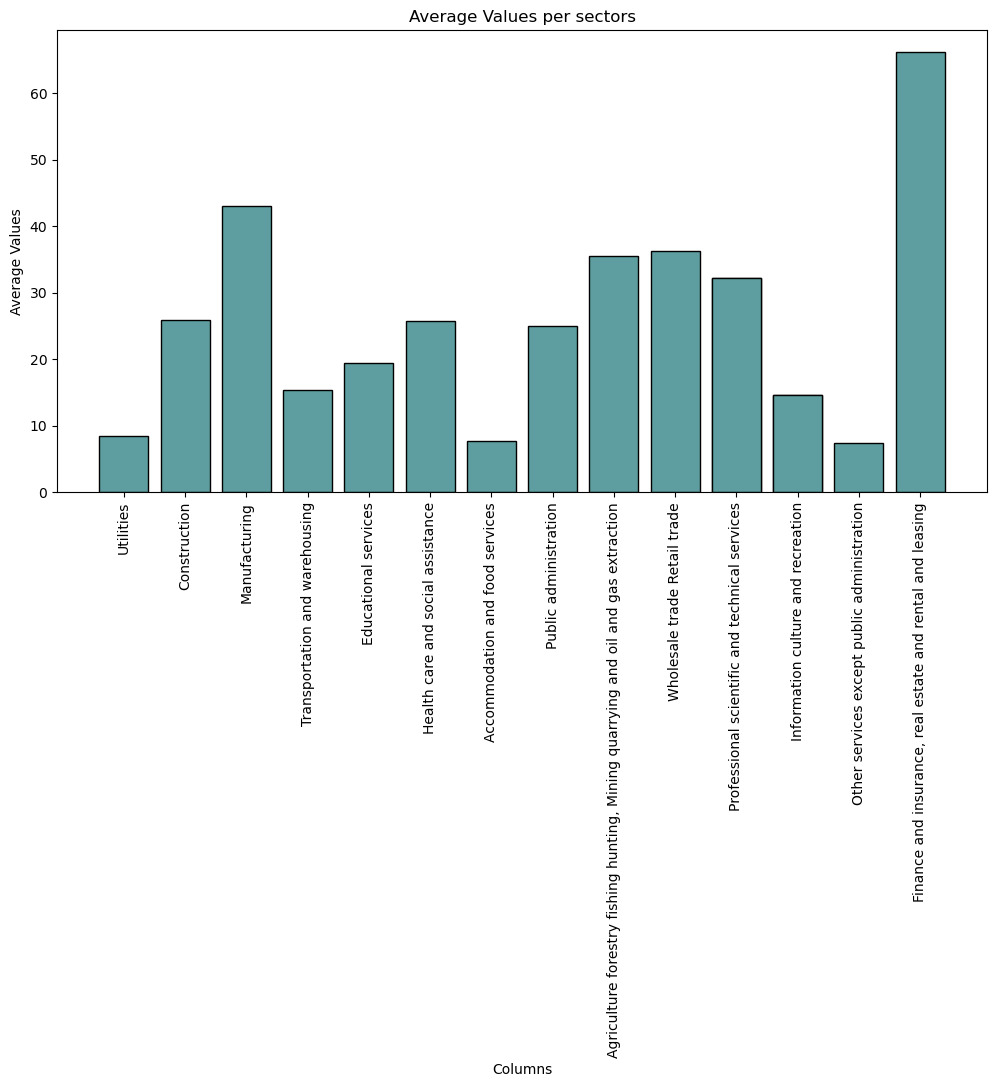

In [ ]:
df = pd.DataFrame(prod_data_clean)

columns_plot = [
    'Utilities',
    'Construction',
    'Manufacturing',
    'Transportation and warehousing',
    'Educational services',
    'Health care and social assistance',
    'Accommodation and food services',
    'Public administration',
    'Agriculture forestry fishing hunting, Mining quarrying and oil and gas extraction',
    'Wholesale trade Retail trade',
    'Professional scientific and technical services',
    'Information culture and recreation',
    'Other services except public administration',
    'Finance and insurance, real estate and rental and leasing',
    'Professional scientific and technical services',
    'Information culture and recreation'
]

average_values = df[columns_plot].mean()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(columns_plot, average_values, color='cadetblue',edgecolor='black')

plt.xlabel('Columns')
plt.ylabel('Average Values')
plt.title('Average Values per sectors')
plt.xticks(rotation=90)

plt.show()

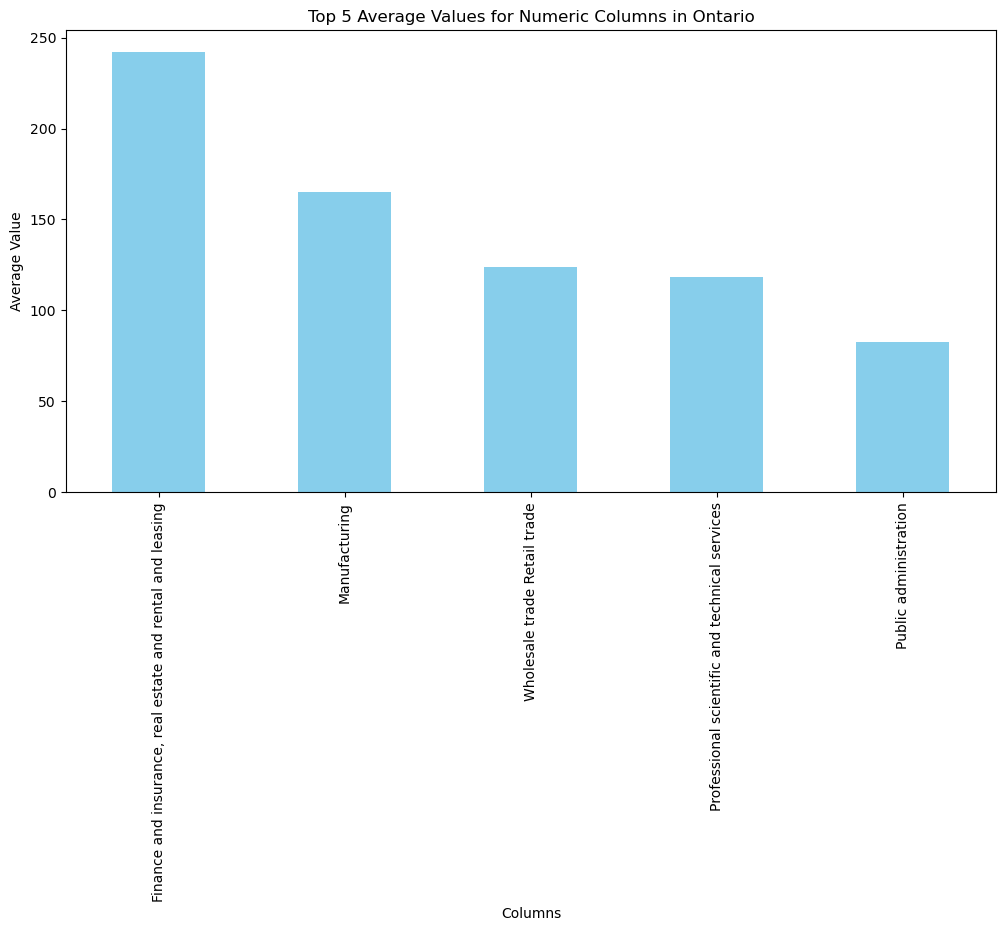

In [ ]:
# Filter rows where 'provincename' is 'Ontario'
ontario_prod = prod_data_clean[prod_data_clean['provincename'] == 'Ontario']

# Select only numeric columns excluding 'Population'
numeric_columns = ontario_prod.select_dtypes(include=['float64']).columns
numeric_columns = numeric_columns[numeric_columns != 'Population']

# Calculate the average for each numeric column excluding 'Population'
average_values = ontario_prod[numeric_columns].mean()

# Select the top 5 average values excluding 'Population'
top_5_average_values = average_values.nlargest(5)

# Plot the top 5 average values
plt.figure(figsize=(12, 6))
top_5_average_values.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Average Value')
plt.title('Top 5 Average Values for Numeric Columns in Ontario')
plt.xticks(rotation=90)
plt.show()

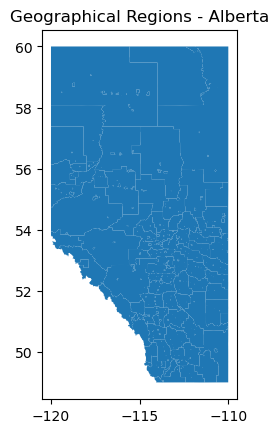

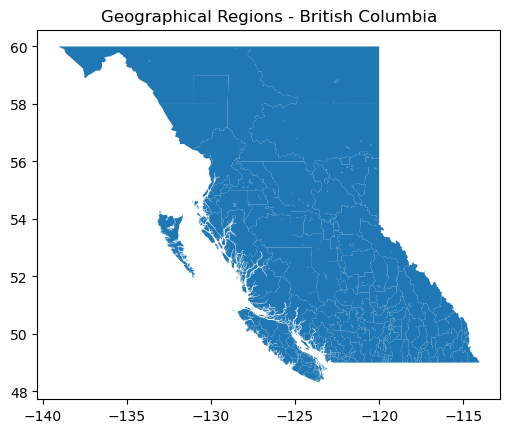

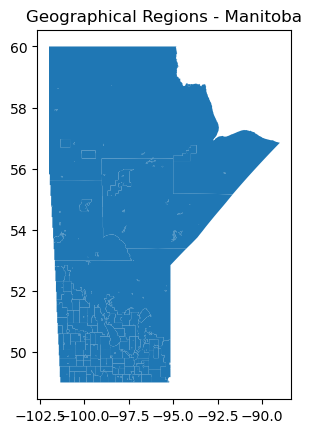

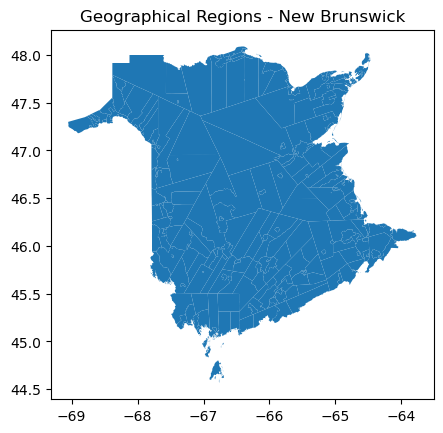

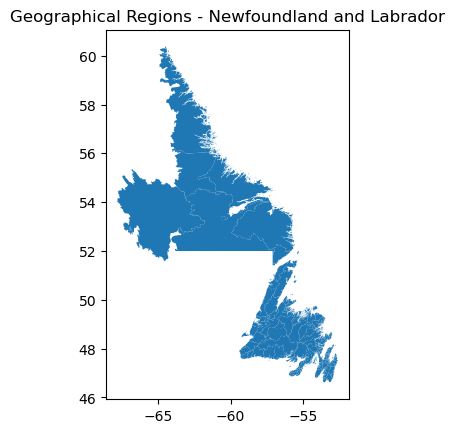

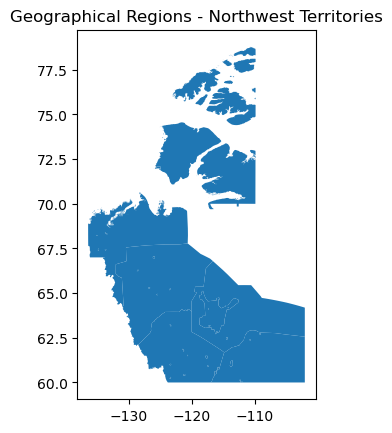

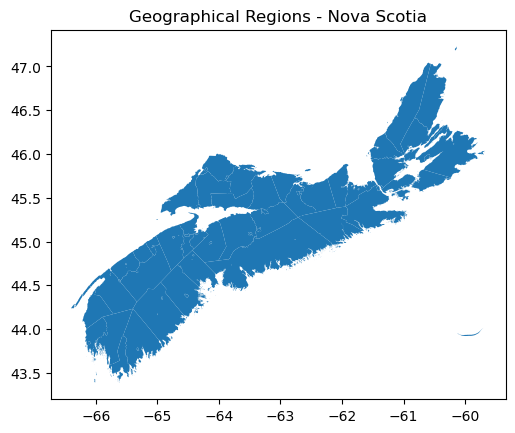

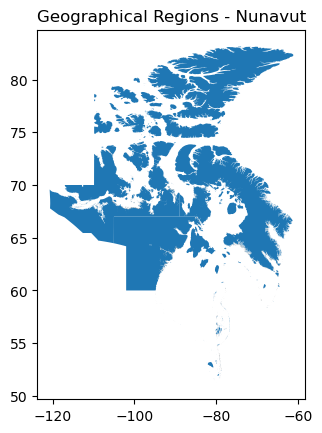

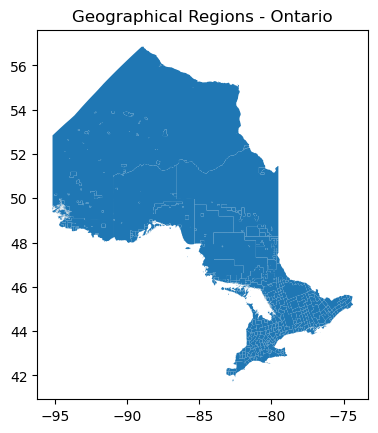

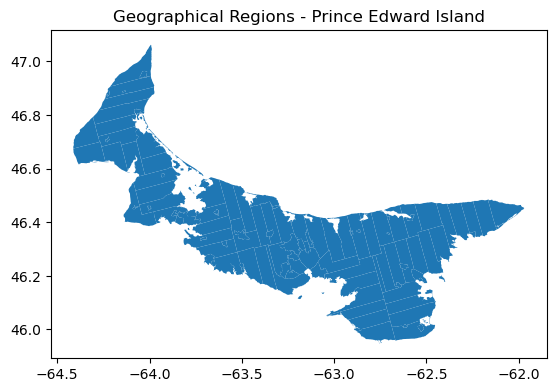

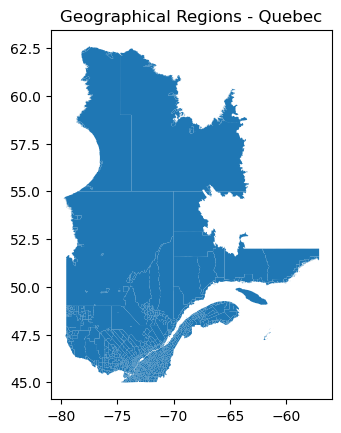

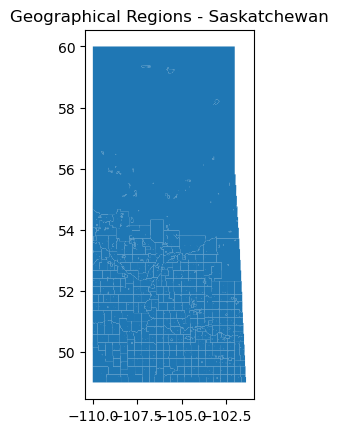

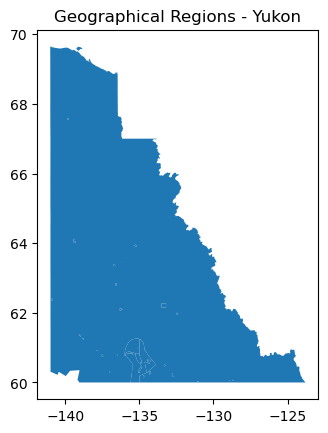

In [ ]:
# Group by the "provincename" column
grouped_data = combined_geographies_geojson.groupby('provincename')

# Plot each group separately
for province, group in grouped_data:
    group.plot()
    plt.title(f"Geographical Regions - {province}")
    plt.show()


## Ontario Productivity Dataset ##

In [ ]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516200 entries, 0 to 1516199
Data columns (total 21 columns):
 #   Column                                                                             Non-Null Count    Dtype  
---  ------                                                                             --------------    -----  
 0   Date                                                                               1516200 non-null  object 
 1   provincename                                                                       1516200 non-null  object 
 2   Utilities                                                                          1342800 non-null  float64
 3   Construction                                                                       1342800 non-null  float64
 4   Manufacturing                                                                      1342800 non-null  float64
 5   Transportation and warehousing                                                     1

In [ ]:
ontario_prod = prod_data[prod_data['provincename'] == 'Ontario']

In [ ]:
ontario_prod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172500 entries, 639600 to 812099
Data columns (total 21 columns):
 #   Column                                                                             Non-Null Count   Dtype  
---  ------                                                                             --------------   -----  
 0   Date                                                                               172500 non-null  object 
 1   provincename                                                                       172500 non-null  object 
 2   Utilities                                                                          162300 non-null  float64
 3   Construction                                                                       162300 non-null  float64
 4   Manufacturing                                                                      162300 non-null  float64
 5   Transportation and warehousing                                                     162300 non

In [ ]:
# drop null rows
ontario_prod = ontario_prod.dropna(axis = 0)

# convert date to datetime format
ontario_prod['Date'] = pd.to_datetime(ontario_prod['Date'])

# lift region name from geojson file
ontario_prod = pd.merge(ontario_prod, geojson_data_csv[['GeoUID', 'Region.Name']], on = 'GeoUID', how = 'left')

## Ontario Weather Dataset ##

In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67710 entries, 0 to 67709
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Longitude (x)               67710 non-null  float64       
 1   Latitude (y)                67710 non-null  float64       
 2   Station Name                67710 non-null  object        
 3   Climate ID                  67710 non-null  object        
 4   Date/Time                   67710 non-null  datetime64[ns]
 5   Year                        67710 non-null  int32         
 6   Month                       67710 non-null  int64         
 7   Mean Max Temp (°C)          67710 non-null  float64       
 8   Mean Max Temp Flag          67710 non-null  object        
 9   Mean Min Temp (°C)          67710 non-null  float64       
 10  Mean Min Temp Flag          67710 non-null  object        
 11  Mean Temp (°C)              67710 non-null  float64   

In [ ]:
geojson_data_csv

GeoUID                     Region.Name provincename  \
0     4801003             Cypress County (MD)      Alberta   
1     4801006               Medicine Hat (CY)      Alberta   
2     4801008    Forty Mile County No. 8 (MD)      Alberta   
3     4801009                   Foremost (VL)      Alberta   
4     4801014                  Bow Island (T)      Alberta   
...       ...                             ...          ...   
5157  6001055               Ibex Valley (HAM)        Yukon   
5158  6001057                     Teslin (TL)        Yukon   
5159  6001058                 Marsh Lake (NO)        Yukon   
5160  6001059  Macpherson-Grizzly Valley (NO)        Yukon   
5161  6001060    Whitehorse, Unorganized (NO)        Yukon   

                                               geometry  
0     MULTIPOLYGON (((-110.003 50.8338, -110.0033 50...  
1     MULTIPOLYGON (((-110.801 50.0527, -110.7993 50...  
2     MULTIPOLYGON (((-110.6738 48.9987, -110.7501 4...  
3     MULTIPOLYGON (((-111.436 49.4649, -111.4376 49...  
4     MULTIPOLYGON (((-111.3692 49.8871, -111.3692 4...  
...                                                 ...  
5157  MULTIPOLYGON (((-135.9887 60.8255, -135.9577 6...  
5158  MULTIPOLYGON (((-132.7394 60.2341, -132.7374 6...  
5159  MULTIPOLYGON (((-134.2056 60.6793, -134.1192 6...  
5160  MULTIPOLYGON (((-134.9649 60.7496, -135.0017 6...  
5161  MULTIPOLYGON (((-134.2056 60.6793, -134.2234 6...  

[5162 rows x 4 columns]

In [ ]:
weather_data.head()

Longitude (x)  Latitude (y) Station Name Climate ID  Date/Time  Year  \
0         -61.68         56.55         NAIN    8502799 2004-11-01  2004   
1         -61.68         56.55         NAIN    8502799 2004-12-01  2004   
2         -61.68         56.55         NAIN    8502799 2005-01-01  2005   
3         -61.68         56.55         NAIN    8502799 2005-02-01  2005   
4         -61.68         56.55         NAIN    8502799 2005-03-01  2005   

   Month  Mean Max Temp (°C) Mean Max Temp Flag  Mean Min Temp (°C)  ...  \
0     11                -0.2                  0                -6.7  ...   
1     12                -9.7                  0               -16.9  ...   
2      1               -18.4                  0               -25.4  ...   
3      2                -8.9                  0               -19.8  ...   
4      3                -5.2                  0               -14.5  ...   

  Total Snow Flag  Total Precip (mm) Total Precip Flag  \
0               0               80.7                 0   
1               0               88.0                 0   
2               0               42.5                 0   
3               0              119.8                 0   
4               0              145.8                 0   

   Snow Grnd Last Day (cm) Snow Grnd Last Day Flag  \
0                     26.0                       0   
1                     24.0                       0   
2                     18.0                       0   
3                     51.0                       0   
4                     45.0                       0   

   Dir of Max Gust (10's deg) Dir of Max Gust Flag  Spd of Max Gust (km/h)  \
0                         0.0                    0                     0.0   
1                         0.0                    0                     0.0   
2                         0.0                    0                     0.0   
3                         0.0                    0                     0.0   
4                         0.0                    0                     0.0   

  Spd of Max Gust Flag  Quarter  
0                    0        4  
1                    0        4  
2                    0        1  
3                    0        1  
4                    0        1  

[5 rows x 30 columns]